### Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot  as plt
import mysql.connector
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


### Customer Data > Pre-Processing

Reading the Customers Csv file

In [2]:
customer_data = pd.read_csv('Customers.csv',encoding='latin1')
customer_data.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


Shape of the Data

In [3]:
print("Number of Rows: " , customer_data.shape[0])
print("Number of Columns: " , customer_data.shape[1])

Number of Rows:  15266
Number of Columns:  10


General Information about the data

In [4]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None


In [5]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerKey,15266.0,1.060508e+06,612709.689556,301.0,514033.5,1079244.5,1593979.5,2099937.0


In [6]:
customer_data.describe(include=object).T

,count,unique,top,freq
Gender,15266,2,Male,7748
Name,15266,15118,John Smith,4
City,15266,8258,Toronto,204
State Code,15256,467,CA,740
State,15266,512,California,715
Zip Code,15266,9505,90017,70
Country,15266,8,United States,6828
Continent,15266,3,North America,8381
Birthday,15266,11270,6/12/1989,5


In [7]:
customer_data[customer_data['CustomerKey'].duplicated()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday


Finding the Null Values

In [8]:
print(customer_data.isnull().sum())


CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64


Checking the state codes which has null values

In [9]:
customer_data[customer_data['State Code'].isna()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


'Napoli' is the only state which has NULL values in State Code

In [10]:
customer_data[customer_data['State'] == 'Napoli']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


Replacing the NULL values with the first 3 characters of the State Napoli

In [11]:

customer_data['State Code'] = customer_data['State Code'].fillna(customer_data['State'].str[:3].str.upper())


In [12]:
customer_data[customer_data['State'] == 'Napoli']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NAP,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NAP,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NAP,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NAP,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NAP,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NAP,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NAP,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NAP,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NAP,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NAP,Napoli,80030,Italy,Europe,3/3/2000


In [13]:
print(customer_data.isnull().sum())

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64


In [14]:
customer_data.groupby('Country')['State'].value_counts()

Country        State            
Australia      New South Wales      430
               Queensland           297
               Victoria             276
               South Australia      168
               Western Australia    156
                                   ... 
United States  Hawaii                25
               Rhode Island          23
               Washington DC         23
               Wyoming               22
               South Dakota          20
Name: count, Length: 512, dtype: int64

In [15]:
customer_data.groupby('Country')['State Code'].value_counts()

Country        State Code
Australia      NSW           430
               QLD           297
               VIC           276
               SA            168
               WA            156
                            ... 
United States  HI             25
               DC             23
               RI             23
               WY             22
               SD             20
Name: count, Length: 512, dtype: int64

Checking if all the zip codes are numeric in nature

In [16]:
customer_data[~customer_data['Zip Code'].str.isdigit()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
1420,200079,Male,Alex Barlow,New Westminster,BC,British Columbia,V3L 5H1,Canada,North America,7/9/1986
1421,200208,Female,Sophie Fagan,Montreal,QC,Quebec,H4A 1H3,Canada,North America,9/17/1962
1422,200370,Male,Paul Maurice,Montreal,QC,Quebec,H3C 5K4,Canada,North America,10/7/1987
1423,200631,Female,Velma Meier,Montreal,QC,Quebec,H3C 5K4,Canada,North America,3/14/1968
1424,200688,Male,John Waddle,Port Hardy,BC,British Columbia,V0N 2P0,Canada,North America,10/28/1969
...,...,...,...,...,...,...,...,...,...,...
8433,1199531,Female,Emily Vincent,IRONSIDE,Aberdeenshire,Aberdeenshire,AB53 4BU,United Kingdom,Europe,5/26/1974
8434,1199657,Male,Elliot Doyle,CHAPEL HILL,North Kesteven,North Kesteven,LN4 0UY,United Kingdom,Europe,11/27/1993
8435,1199660,Male,Oscar Webb,ROSEWELL,Midlothian,Midlothian,EH24 4WJ,United Kingdom,Europe,2/3/1980
8436,1199675,Male,Jordan Randall,BRIGHSTONE,Isle of Wight,Isle of Wight,PO30 9WS,United Kingdom,Europe,12/10/1951


ZipCode value contains Numeric as well as Alpha-Numeric Values

Converting the Birthday column from object data type to Date data type

In [17]:
customer_data['Birthday'] = pd.to_datetime(customer_data['Birthday'], format = "%m/%d/%Y")

In [18]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB
None


Checking the Gender Column

In [19]:
customer_data['Gender'].value_counts()

Gender
Male      7748
Female    7518
Name: count, dtype: int64

Adding a new column 'Age' to the data

In [20]:
today = pd.Timestamp('today')
customer_data['Age'] = ""
for i in range(len(customer_data)):
    customer_data['Age'][i] = (((today -customer_data['Birthday'][i]).days) // 365)

In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
 10  Age          15266 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.3+ MB


In [22]:
customer_data['Age'] = customer_data['Age'].astype(int)

In [23]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
 10  Age          15266 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 1.2+ MB


Creating 'Age Group' column with Age

In [24]:
min(customer_data.Age)

22

In [25]:
max(customer_data.Age)

89

In [26]:
bins = [18, 35, 60, 100]
labels = ['Young', 'Middle Age', 'Senior']

customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=bins, labels=labels)

In [27]:
customer_data.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85,Senior
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44,Middle Age
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77,Senior
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67,Senior
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58,Middle Age


### Sales Data > Pre-Processing

Reading the Sale CSV file

In [28]:
sales_data = pd.read_csv('Sales.csv')
sales_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


Shape of the Data

In [29]:
print("Number of Rows: ",sales_data.shape[0])
print("Number of Columns: ",sales_data.shape[1])

Number of Rows:  62884
Number of Columns:  9


Genereal Information about the data

In [30]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [31]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order Number,62884.0,1.430905e+06,453296.304711,366000.0,1121017.0,1498015.5,1788010.0,2243032.0
Line Item,62884.0,2.164207e+00,1.365170,1.0,1.0,2.0,3.0,7.0
CustomerKey,62884.0,1.180797e+06,585963.395414,301.0,680858.0,1261200.5,1686496.0,2099937.0
StoreKey,62884.0,3.180214e+01,22.978188,0.0,8.0,37.0,53.0,66.0
ProductKey,62884.0,1.125859e+03,709.244010,1.0,437.0,1358.0,1650.0,2517.0
Quantity,62884.0,3.144790e+00,2.256371,1.0,1.0,2.0,4.0,10.0


In [32]:
sales_data.describe(include=object).T

,count,unique,top,freq
Order Date,62884,1641,12/21/2019,222
Delivery Date,13165,1492,1/6/2020,50
Currency Code,62884,5,USD,33767


Checking for null values

In [33]:
sales_data.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

Around 79% of the data of Delivery Date column is Null value

In [34]:
(sales_data.isna().sum() / len(sales_data))*100

Order Number      0.000000
Line Item         0.000000
Order Date        0.000000
Delivery Date    79.064627
CustomerKey       0.000000
StoreKey          0.000000
ProductKey        0.000000
Quantity          0.000000
Currency Code     0.000000
dtype: float64

In [35]:
sales_data['Delivery Date'].isnull().sum()

49719

In [36]:
sales_data[~sales_data['Delivery Date'].isnull()]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2/20/2021,2/27/2021,887764,0,1456,2,EUR
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


Only for Online orders we have delivery date not for instore orders

In [37]:
sales_data[sales_data['StoreKey'] == 0]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2/20/2021,2/27/2021,887764,0,1456,2,EUR
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


Creating a New column 'Order Type'

In [38]:
sales_data['Order Type'] = ""


for i in range(len(sales_data)):
    if sales_data['StoreKey'][i] == 0:
        sales_data['Order Type'][i] = 'Online'
    else:
        sales_data['Order Type'][i] = 'In-Store'

In [39]:
sales_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,In-Store
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD,Online
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD,Online
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD,Online
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD,Online


Changing the data type of 'Order Date' and 'Delivery Date' columns from object to date type

In [40]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format = "%m/%d/%Y")
sales_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type
0,366000,1,2016-01-01,NaN,265598,10,1304,1,CAD,In-Store
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD,Online
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD,Online
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD,Online
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD,Online


In [41]:
sales_data['Delivery Date'] = pd.to_datetime(sales_data['Delivery Date'], format = "%m/%d/%Y")
sales_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online


Adding four more columns Year, Month, Date and Day from the order date column

In [42]:
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Date'] = sales_data['Order Date'].dt.day
sales_data['Day'] = sales_data['Order Date'].dt.strftime('%A')

sales_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,Year,Month,Date,Day
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,2016,1,1,Friday
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,2016,1,1,Friday
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,2016,1,1,Friday
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,2016,1,1,Friday
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,2016,1,1,Friday


Normalizing the Sales table to Order details, Online Orders and Sales Data tables

Creating Order Details Table

In [43]:
Order_Details = sales_data.copy()

In [44]:
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
 9   Order Type     62884 non-null  object        
 10  Year           62884 non-null  int32         
 11  Month          62884 non-null  int32         
 12  Date           62884 non-null  int32         
 13  Day            62884 non-null  object        
dtypes: datetime64[ns](2), int32(3), int64(6), object(3)
memory usage: 6.0+

In [45]:
Order_Details.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Order Type', 'Year', 'Month', 'Date', 'Day'],
      dtype='object')

Dropping the columns that are not necessary for Order Details table

In [46]:
Order_Details = Order_Details.drop(columns=['Line Item','Delivery Date','ProductKey','Quantity'])

In [47]:
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Order Date     62884 non-null  datetime64[ns]
 2   CustomerKey    62884 non-null  int64         
 3   StoreKey       62884 non-null  int64         
 4   Currency Code  62884 non-null  object        
 5   Order Type     62884 non-null  object        
 6   Year           62884 non-null  int32         
 7   Month          62884 non-null  int32         
 8   Date           62884 non-null  int32         
 9   Day            62884 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(3), object(3)
memory usage: 4.1+ MB


In [48]:
Order_Details.head()

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday
2,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday
3,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday
4,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday


In [49]:
len(Order_Details['Order Number'].unique())

26326

In [50]:
Order_Details[Order_Details['Order Number'].duplicated()]

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day
2,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday
4,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday
5,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday
7,366004,2016-01-01,1107461,38,GBP,In-Store,2016,1,1,Friday
10,366007,2016-01-01,2035771,43,USD,In-Store,2016,1,1,Friday
...,...,...,...,...,...,...,...,...,...,...
62876,2243029,2021-02-20,887764,0,EUR,Online,2021,2,20,Saturday
62877,2243029,2021-02-20,887764,0,EUR,Online,2021,2,20,Saturday
62878,2243029,2021-02-20,887764,0,EUR,Online,2021,2,20,Saturday
62882,2243032,2021-02-20,331277,0,CAD,Online,2021,2,20,Saturday


Dropping the rows with duplicate order numbers

In [51]:
Order_Details = Order_Details[~Order_Details['Order Number'].duplicated()]

In [52]:
Order_Details.shape

(26326, 10)

In [53]:
Order_Details.head()

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday
3,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday
6,366004,2016-01-01,1107461,38,GBP,In-Store,2016,1,1,Friday
8,366005,2016-01-01,844003,33,EUR,In-Store,2016,1,1,Friday


Creating Online Orders Table

In [54]:
Online_Orders = sales_data.copy()

In [55]:
Online_Orders.shape

(62884, 14)

In [56]:
Online_Orders.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Order Type', 'Year', 'Month', 'Date', 'Day'],
      dtype='object')

Dropping the columns that are not required for Online_Orders table

In [57]:
Online_Orders = Online_Orders.drop(columns=['Line Item','CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Order Type', 'Year', 'Month', 'Date', 'Day'])

In [58]:
Online_Orders.shape

(62884, 3)

In [59]:
Online_Orders.head()

,Order Number,Order Date,Delivery Date
0,366000,2016-01-01,NaT
1,366001,2016-01-01,2016-01-13
2,366001,2016-01-01,2016-01-13
3,366002,2016-01-01,2016-01-12
4,366002,2016-01-01,2016-01-12


In [60]:
Online_Orders.isnull().sum()

Order Number         0
Order Date           0
Delivery Date    49719
dtype: int64

Dropping the rows with delivery date as null since they are not online orders

In [61]:
Online_Orders[Online_Orders['Delivery Date'].isnull()]

,Order Number,Order Date,Delivery Date
0,366000,2016-01-01,NaT
6,366004,2016-01-01,NaT
7,366004,2016-01-01,NaT
8,366005,2016-01-01,NaT
9,366007,2016-01-01,NaT
...,...,...,...
62867,2243025,2021-02-20,NaT
62868,2243025,2021-02-20,NaT
62869,2243026,2021-02-20,NaT
62872,2243028,2021-02-20,NaT


In [62]:
Online_Orders = Online_Orders[~Online_Orders['Delivery Date'].isnull()]

In [63]:
Online_Orders.shape

(13165, 3)

In [64]:
Online_Orders.head()

,Order Number,Order Date,Delivery Date
1,366001,2016-01-01,2016-01-13
2,366001,2016-01-01,2016-01-13
3,366002,2016-01-01,2016-01-12
4,366002,2016-01-01,2016-01-12
5,366002,2016-01-01,2016-01-12


Dropping the duplicate order numbers

In [65]:
Online_Orders[Online_Orders['Order Number'].duplicated()]

,Order Number,Order Date,Delivery Date
2,366001,2016-01-01,2016-01-13
4,366002,2016-01-01,2016-01-12
5,366002,2016-01-01,2016-01-12
25,366014,2016-01-01,2016-01-06
32,367005,2016-01-02,2016-01-10
...,...,...,...
62876,2243029,2021-02-20,2021-02-27
62877,2243029,2021-02-20,2021-02-27
62878,2243029,2021-02-20,2021-02-27
62882,2243032,2021-02-20,2021-02-23


In [66]:
Online_Orders = Online_Orders[~Online_Orders['Order Number'].duplicated()]

In [67]:
Online_Orders.shape

(5580, 3)

In [68]:
Online_Orders.head()

,Order Number,Order Date,Delivery Date
1,366001,2016-01-01,2016-01-13
3,366002,2016-01-01,2016-01-12
15,366010,2016-01-01,2016-01-08
24,366014,2016-01-01,2016-01-06
31,367005,2016-01-02,2016-01-10


Creating a new Sales data from existing sales data

In [69]:
sales_data_new = sales_data.copy()

In [70]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
 9   Order Type     62884 non-null  object        
 10  Year           62884 non-null  int32         
 11  Month          62884 non-null  int32         
 12  Date           62884 non-null  int32         
 13  Day            62884 non-null  object        
dtypes: datetime64[ns](2), int32(3), int64(6), object(3)
memory usage: 6.0+

Dropping the columns that are not required for the new sales data table

In [71]:
sales_data_new.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Order Type', 'Year', 'Month', 'Date', 'Day'],
      dtype='object')

Dropping the columns that are not required

In [72]:
sales_data_new = sales_data_new.drop(columns=['Order Date', 'Delivery Date', 'CustomerKey', 'StoreKey', 'Currency Code',
                                              'Order Type', 'Year', 'Month', 'Date', 'Day' ])

In [73]:
sales_data_new.head()

,Order Number,Line Item,ProductKey,Quantity
0,366000,1,1304,1
1,366001,1,1048,2
2,366001,2,2007,1
3,366002,1,1106,7
4,366002,2,373,1


In [74]:
sales_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order Number  62884 non-null  int64
 1   Line Item     62884 non-null  int64
 2   ProductKey    62884 non-null  int64
 3   Quantity      62884 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


### Products Data > Pre-Processing

Reading the Product CSV file

In [75]:
products_data = pd.read_csv('Products.csv')
products_data.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


Shape of the data

In [76]:
print("Number of Rows: ", products_data.shape[0])
print("Number of Columns: ", products_data.shape[1])

Number of Rows:  2517
Number of Columns:  10


General Information about the data

In [77]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [78]:
products_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductKey,2517.0,1259.000000,726.739637,1.0,630.0,1259.0,1888.0,2517.0
SubcategoryKey,2517.0,491.810091,229.887134,101.0,305.0,406.0,801.0,808.0
CategoryKey,2517.0,4.878824,2.299170,1.0,3.0,4.0,8.0,8.0


In [79]:
products_data.describe(include=object).T

,count,unique,top,freq
Product Name,2517,2517,Contoso 512MB MP3 Player E51 Silver,1
Brand,2517,11,Contoso,710
Color,2517,16,Black,602
Unit Cost USD,2517,480,$15.29,34
Unit Price USD,2517,426,$29.99,30
Subcategory,2517,32,Computers Accessories,201
Category,2517,8,Home Appliances,661


Checking for Null values

In [80]:
products_data.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

Checking whether there are any duplcates in Product Key

In [81]:
products_data[products_data['ProductKey'].duplicated()]

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category


Removing the '$' and ',' characters from Unit Price and unit cost, also changing the Unit Price and Unit Cost column to float type for calculations

In [82]:
for i in range(len(products_data['Unit Price USD'])):
    products_data['Unit Price USD'][i] = products_data['Unit Price USD'][i].strip('$')

In [83]:
for i in range(len(products_data['Unit Price USD'])):
    products_data['Unit Price USD'][i] = products_data['Unit Price USD'][i].replace(',','')

In [84]:
products_data['Unit Price USD'] = products_data['Unit Price USD'].astype('float')

In [85]:
for i in range(len(products_data['Unit Cost USD'])):
    products_data['Unit Cost USD'][i] = products_data['Unit Cost USD'][i].strip('$')

In [86]:
for i in range(len(products_data['Unit Cost USD'])):
    products_data['Unit Cost USD'][i] = products_data['Unit Cost USD'][i].replace(',','')

In [87]:
products_data['Unit Cost USD'] = products_data['Unit Cost USD'].astype('float')

In [88]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


### Stores Data > Pre-Processing

Reading the Stores CSV file

In [89]:
stores_data = pd.read_csv('Stores.csv')
stores_data.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


Shape of the Data

In [90]:
print("Number of Rows: ", stores_data.shape[0])
print("Number of Columns: ", stores_data.shape[1])

Number of Rows:  67
Number of Columns:  5


General Information of the data

In [91]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [92]:
stores_data.describe().T

,count,mean,std,min,25%,50%,75%,max
StoreKey,67.0,33.00000,19.485037,0.0,16.50,33.0,49.5,66.0
Square Meters,66.0,1402.19697,576.404058,245.0,1108.75,1347.5,2000.0,2105.0


In [93]:
stores_data.describe(include=object).T

,count,unique,top,freq
Country,67,9,United States,24
State,67,67,Australian Capital Territory,1
Open Date,67,25,1/1/2010,9


Checking for Null values

In [94]:
stores_data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

Square meters for Onlie is NaN

In [95]:
stores_data[stores_data['Square Meters'].isnull()]

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,1/1/2010


Changing the square meters of online to 0

In [96]:
stores_data = stores_data.fillna(0)

In [97]:
stores_data[stores_data['Square Meters'] == 0]

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,0.0,1/1/2010


Changing the date type of 'Open Date' column from object type to date type

In [98]:
stores_data['Open Date'] = pd.to_datetime(stores_data['Open Date'], format = "%m/%d/%Y")
stores_data.tail()

,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01
66,0,Online,Online,0.0,2010-01-01


### Exchange Rates Data > Pre-Processing

Reading the Excahange Rates CSV file

In [106]:
exchange_rates_data = pd.read_csv('Exchange_Rates.csv')
exchange_rates_data.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


Shape of the Data

In [107]:
print("Number of Rows: ", exchange_rates_data.shape[0])
print("Number of Columns: ", exchange_rates_data.shape[1])

Number of Rows:  11215
Number of Columns:  3


General information about the data

In [108]:
exchange_rates_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Exchange,11215.0,1.061682,0.245519,0.6285,0.8578,1.0,1.3119,1.7253


In [109]:
exchange_rates_data.describe(include=object).T

,count,unique,top,freq
Date,11215,2243,1/1/2015,5
Currency,11215,5,USD,2243


In [110]:
exchange_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


Checking for Null values

In [111]:
exchange_rates_data.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

Changing the date type of 'Date' column from object type to date type

In [112]:
exchange_rates_data['Date'] = pd.to_datetime(exchange_rates_data['Date'], format = "%m/%d/%Y")
exchange_rates_data.head()

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


### Sales <-> Customers 

Merging the Sales and Customers data

In [113]:
customer_data.head(2)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85,Senior
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44,Middle Age


In [114]:
sales_data.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,Year,Month,Date,Day
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,2016,1,1,Friday
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,2016,1,1,Friday


In [115]:
Order_Details.head(2)

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday


In [116]:
Sales_Customers_merged = pd.merge(Order_Details,customer_data, on='CustomerKey', how='inner')
Sales_Customers_merged.head()

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day,...,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday,...,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,53,Middle Age
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday,...,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,28,Young
2,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday,...,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,62,Senior
3,366004,2016-01-01,1107461,38,GBP,In-Store,2016,1,1,Friday,...,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,1979-11-28,44,Middle Age
4,366005,2016-01-01,844003,33,EUR,In-Store,2016,1,1,Friday,...,Ouassim Heuver,Leeuwarden,FR,Friesland,8916 CD,Netherlands,Europe,1995-06-22,29,Young


In [117]:
Sales_Customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26326 entries, 0 to 26325
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   26326 non-null  int64         
 1   Order Date     26326 non-null  datetime64[ns]
 2   CustomerKey    26326 non-null  int64         
 3   StoreKey       26326 non-null  int64         
 4   Currency Code  26326 non-null  object        
 5   Order Type     26326 non-null  object        
 6   Year           26326 non-null  int32         
 7   Month          26326 non-null  int32         
 8   Date           26326 non-null  int32         
 9   Day            26326 non-null  object        
 10  Gender         26326 non-null  object        
 11  Name           26326 non-null  object        
 12  City           26326 non-null  object        
 13  State Code     26326 non-null  object        
 14  State          26326 non-null  object        
 15  Zip Code       2632

In [118]:
Sales_Customers_merged[Sales_Customers_merged['Year'].isnull() == True]

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day,...,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group


In [119]:
Sales_Customers_merged = Sales_Customers_merged.astype({'Year': int, 'Month': int, 'Date':int})
Sales_Customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26326 entries, 0 to 26325
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   26326 non-null  int64         
 1   Order Date     26326 non-null  datetime64[ns]
 2   CustomerKey    26326 non-null  int64         
 3   StoreKey       26326 non-null  int64         
 4   Currency Code  26326 non-null  object        
 5   Order Type     26326 non-null  object        
 6   Year           26326 non-null  int32         
 7   Month          26326 non-null  int32         
 8   Date           26326 non-null  int32         
 9   Day            26326 non-null  object        
 10  Gender         26326 non-null  object        
 11  Name           26326 non-null  object        
 12  City           26326 non-null  object        
 13  State Code     26326 non-null  object        
 14  State          26326 non-null  object        
 15  Zip Code       2632

In [120]:
Sales_Customers_merged.head()

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day,...,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday,...,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,53,Middle Age
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday,...,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,28,Young
2,366002,2016-01-01,266019,0,CAD,Online,2016,1,1,Friday,...,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,62,Senior
3,366004,2016-01-01,1107461,38,GBP,In-Store,2016,1,1,Friday,...,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,1979-11-28,44,Middle Age
4,366005,2016-01-01,844003,33,EUR,In-Store,2016,1,1,Friday,...,Ouassim Heuver,Leeuwarden,FR,Friesland,8916 CD,Netherlands,Europe,1995-06-22,29,Young


#### RFM Calculations

- RECENCY (R): Time since last purchases
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value

In [121]:
oldest_date = min(Sales_Customers_merged['Order Date'])
oldest_date

Timestamp('2016-01-01 00:00:00')

In [122]:
latest_date = max(Sales_Customers_merged['Order Date'])
latest_date

Timestamp('2021-02-20 00:00:00')

In [123]:
Sales_Customers_merged['last_purchase_date'] = Sales_Customers_merged.groupby('CustomerKey')['Order Date'].transform(max)

In [124]:
Sales_Customers_merged.head(2)

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day,...,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group,last_purchase_date
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday,...,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,53,Middle Age,2019-10-15
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday,...,Auberry,CA,California,93602,United States,North America,1995-11-20,28,Young,2016-01-01


In [125]:
# calculating the days since last purchase date for each customers taking last billed invoice date as reference

In [126]:
Sales_Customers_merged["customer_recency"] = latest_date - Sales_Customers_merged["last_purchase_date"]

In [127]:
Sales_Customers_merged.head(2)

,Order Number,Order Date,CustomerKey,StoreKey,Currency Code,Order Type,Year,Month,Date,Day,...,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group,last_purchase_date,customer_recency
0,366000,2016-01-01,265598,10,CAD,In-Store,2016,1,1,Friday,...,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,53,Middle Age,2019-10-15,494 days
1,366001,2016-01-01,1269051,0,USD,Online,2016,1,1,Friday,...,CA,California,93602,United States,North America,1995-11-20,28,Young,2016-01-01,1877 days


In [128]:
Sales_Customers_merged[["CustomerKey", 'last_purchase_date', "customer_recency"]]

,CustomerKey,last_purchase_date,customer_recency
0,265598,2019-10-15,494 days
1,1269051,2016-01-01,1877 days
2,266019,2019-01-08,774 days
3,1107461,2019-12-07,441 days
4,844003,2016-01-01,1877 days
...,...,...,...
26321,1728060,2021-02-20,0 days
26322,887764,2021-02-20,0 days
26323,1216913,2021-02-20,0 days
26324,511229,2021-02-20,0 days


In [129]:
Sales_Customers_merged['recency'] = pd.to_numeric(Sales_Customers_merged['customer_recency'].dt.days.astype('int64'))

In [130]:
customer_recency = Sales_Customers_merged.groupby('CustomerKey', as_index=False)['recency'].mean()

In [131]:
customer_recency.sort_values(by='recency', ascending=False).head()

,CustomerKey,recency
6628,1269051,1877.0
4311,844003,1877.0
11489,2035771,1877.0
3876,763246,1876.0
7713,1438050,1876.0


In [132]:
# we already have recency we can drop last_purchase_date
Sales_Customers_merged.drop(columns='last_purchase_date',inplace=True)

frequency calculation

In [133]:
customer_frequency = Sales_Customers_merged.groupby('CustomerKey', as_index=False)['Order Number'].nunique()
customer_frequency.rename(columns={'Order Number':'Frequency'}, inplace=True)
customer_frequency.sort_values(by='Frequency', ascending=False)


,CustomerKey,Frequency
3664,723572,14
11761,2080484,12
7122,1349131,11
6732,1286602,10
4766,930705,10
...,...,...
4907,958319,1
4905,958193,1
4901,957765,1
4899,957677,1


Calculating Monetary

In [134]:
sale_prods = sales_data.merge(products_data, on='ProductKey', how='inner' )
sale_prods.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Day,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,Friday,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,Friday,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.0,402,Digital SLR Cameras,4,Cameras and camcorders


In [135]:
sale_prods['Total Amount'] = sale_prods['Quantity'] * sale_prods['Unit Price USD']
sale_prods['Total Amount']

0          68.00
1         854.00
2         665.94
3        2254.00
4         326.00
          ...   
62879     417.00
62880     480.00
62881     219.98
62882     140.26
62883    4753.00
Name: Total Amount, Length: 62884, dtype: float64

Calculating Total Bill Amount for each order number

In [136]:
total_bill = pd.DataFrame(sale_prods.groupby('Order Number')['Total Amount'].sum().reset_index())
total_bill.columns = ['Order Number', 'Total BillAmount']
total_bill.head()

,Order Number,Total BillAmount
0,366000,68.00
1,366001,1519.94
2,366002,5164.00
3,366004,10063.20
4,366005,1876.00


In [137]:
total_bill_final = total_bill.merge(sale_prods, on='Order Number', how='inner')
total_bill_final.head(2)

,Order Number,Total BillAmount,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,...,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount
0,366000,68.00,1,2016-01-01,NaT,265598,10,1304,1,CAD,...,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,68.0
1,366001,1519.94,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,...,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.0,402,Digital SLR Cameras,4,Cameras and camcorders,854.0


In [138]:
total_bill_final.columns

Index(['Order Number', 'Total BillAmount', 'Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity',
       'Currency Code', 'Order Type', 'Year', 'Month', 'Date', 'Day',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category',
       'Total Amount'],
      dtype='object')

In [139]:
total_bill_final = total_bill_final.drop(columns=['Line Item','Delivery Date','ProductKey', 'Quantity','Currency Code','Product Name',
                                                   'Brand', 'Color',
                                                   'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
                                                   'CategoryKey', 'Category','Total Amount'])
total_bill_final.head()

,Order Number,Total BillAmount,Order Date,CustomerKey,StoreKey,Order Type,Year,Month,Date,Day
0,366000,68.00,2016-01-01,265598,10,In-Store,2016,1,1,Friday
1,366001,1519.94,2016-01-01,1269051,0,Online,2016,1,1,Friday
2,366001,1519.94,2016-01-01,1269051,0,Online,2016,1,1,Friday
3,366002,5164.00,2016-01-01,266019,0,Online,2016,1,1,Friday
4,366002,5164.00,2016-01-01,266019,0,Online,2016,1,1,Friday


In [140]:
total_bill_final[~total_bill_final['Order Number'].duplicated()]

,Order Number,Total BillAmount,Order Date,CustomerKey,StoreKey,Order Type,Year,Month,Date,Day
0,366000,68.00,2016-01-01,265598,10,In-Store,2016,1,1,Friday
1,366001,1519.94,2016-01-01,1269051,0,Online,2016,1,1,Friday
3,366002,5164.00,2016-01-01,266019,0,Online,2016,1,1,Friday
6,366004,10063.20,2016-01-01,1107461,38,In-Store,2016,1,1,Friday
8,366005,1876.00,2016-01-01,844003,33,In-Store,2016,1,1,Friday
...,...,...,...,...,...,...,...,...,...,...
62872,2243028,29.97,2021-02-20,1728060,66,In-Store,2021,2,20,Saturday
62873,2243029,4765.86,2021-02-20,887764,0,Online,2021,2,20,Saturday
62879,2243030,417.00,2021-02-20,1216913,43,In-Store,2021,2,20,Saturday
62880,2243031,480.00,2021-02-20,511229,0,Online,2021,2,20,Saturday


In [141]:
total_bill_final = total_bill_final[~total_bill_final.duplicated()]
total_bill_final

,Order Number,Total BillAmount,Order Date,CustomerKey,StoreKey,Order Type,Year,Month,Date,Day
0,366000,68.00,2016-01-01,265598,10,In-Store,2016,1,1,Friday
1,366001,1519.94,2016-01-01,1269051,0,Online,2016,1,1,Friday
3,366002,5164.00,2016-01-01,266019,0,Online,2016,1,1,Friday
6,366004,10063.20,2016-01-01,1107461,38,In-Store,2016,1,1,Friday
8,366005,1876.00,2016-01-01,844003,33,In-Store,2016,1,1,Friday
...,...,...,...,...,...,...,...,...,...,...
62872,2243028,29.97,2021-02-20,1728060,66,In-Store,2021,2,20,Saturday
62873,2243029,4765.86,2021-02-20,887764,0,Online,2021,2,20,Saturday
62879,2243030,417.00,2021-02-20,1216913,43,In-Store,2021,2,20,Saturday
62880,2243031,480.00,2021-02-20,511229,0,Online,2021,2,20,Saturday


In [142]:
customer_monetary = total_bill_final.groupby('CustomerKey', as_index=False)['Total BillAmount'].sum()
customer_monetary.rename(columns={'Total BillAmount':'Monetary'}, inplace=True)
customer_monetary.sort_values(by='Monetary', ascending=False).head()

,CustomerKey,Monetary
9371,1702221,61871.70
10515,1884663,43517.80
11072,1969704,42788.04
2743,535496,41521.53
2840,551036,40556.54


Merging the Customer Receny, Frequency and Monetary all together

In [143]:
customer_rfm = pd.merge(pd.merge(customer_recency, customer_frequency, on='CustomerKey'), customer_monetary, on='CustomerKey')
customer_rfm.head()

,CustomerKey,recency,Frequency,Monetary
0,301,467.0,1,592.00
1,325,413.0,3,5787.67
2,554,443.0,2,951.71
3,1042,1082.0,1,1124.91
4,1314,1159.0,1,2539.86


Segmentation of customers using RFM scores

Calculating RFM scores

In [144]:
customer_rfm1=customer_rfm.copy()
customer_rfm1.head()

,CustomerKey,recency,Frequency,Monetary
0,301,467.0,1,592.00
1,325,413.0,3,5787.67
2,554,443.0,2,951.71
3,1042,1082.0,1,1124.91
4,1314,1159.0,1,2539.86


This scoring is based on categorising R, F, M values in 4 buckets, basically deviding the values into quaters

- 4 is given to the top value and 1 for least value

In [145]:
customer_rfm1.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerKey,11887.0,1.110392e+06,599107.845521,301.00,574965.500,1153522.0,1627821.000,2099937.0
recency,11887.0,6.141421e+02,406.202795,0.00,366.000,508.0,795.000,1877.0
Frequency,11887.0,2.214688e+00,1.391487,1.00,1.000,2.0,3.000,14.0
Monetary,11887.0,4.690458e+03,5197.622706,1.99,1138.915,2995.0,6425.065,61871.7


In [146]:
quantiles = customer_rfm1.quantile(q = [0.25, 0.50, 0.75])
quantiles

,CustomerKey,recency,Frequency,Monetary
0.25,574965.5,366.0,1.0,1138.915
0.50,1153522.0,508.0,2.0,2995.000
0.75,1627821.0,795.0,3.0,6425.065


Recency Score

In [147]:
def r_score(rfm):
    if rfm.recency <= 366.0:
        recency_score = 4
    elif rfm.recency <= 508.0:
        recency_score = 3
    elif rfm.recency <= 795.0:
        recency_score = 2
    else:
        recency_score = 1
    return recency_score

customer_rfm1['Recency_Score'] = customer_rfm1.apply(r_score, axis=1)
customer_rfm1.head()

,CustomerKey,recency,Frequency,Monetary,Recency_Score
0,301,467.0,1,592.00,3
1,325,413.0,3,5787.67,3
2,554,443.0,2,951.71,3
3,1042,1082.0,1,1124.91,1
4,1314,1159.0,1,2539.86,1


In [148]:
customer_rfm1['Recency_Score'].value_counts()

Recency_Score
4    3007
2    2974
1    2962
3    2944
Name: count, dtype: int64

Frequency Score

In [149]:
def f_score(rfm):
    if rfm.Frequency >= 10.0:
        frequency_score = 4
    elif rfm.Frequency >= 5.0:
        frequency_score = 3
    elif rfm.Frequency >= 2.0:
        frequency_score = 2
    else:
        frequency_score = 1
    return frequency_score

customer_rfm1['Frequency_Score'] = customer_rfm1.apply(f_score, axis=1)
customer_rfm1.head()

,CustomerKey,recency,Frequency,Monetary,Recency_Score,Frequency_Score
0,301,467.0,1,592.00,3,1
1,325,413.0,3,5787.67,3,2
2,554,443.0,2,951.71,3,2
3,1042,1082.0,1,1124.91,1,1
4,1314,1159.0,1,2539.86,1,1


In [150]:
customer_rfm1['Frequency_Score'].value_counts()

Frequency_Score
2    6466
1    4615
3     791
4      15
Name: count, dtype: int64

Monetary Score

In [151]:
def m_score(rfm):
    if rfm.Monetary >= 6425.065:
        monetary_score = 4
    elif rfm.Monetary >= 2995.000:
        monetary_score = 3
    elif rfm.Monetary >= 1138.915:
        monetary_score = 2
    else:
        monetary_score = 1
    return monetary_score

customer_rfm1['Monetary_Score'] = customer_rfm1.apply(m_score, axis=1)
customer_rfm1.head()

,CustomerKey,recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,301,467.0,1,592.00,3,1,1
1,325,413.0,3,5787.67,3,2,3
2,554,443.0,2,951.71,3,2,1
3,1042,1082.0,1,1124.91,1,1,1
4,1314,1159.0,1,2539.86,1,1,2


In [152]:
customer_rfm1['Monetary_Score'].value_counts()

Monetary_Score
1    2972
3    2972
4    2972
2    2971
Name: count, dtype: int64

Now we'll calculate the RFM score by combaining RFM values, this is not just by adding RFM values inestad we'll concate those values

In [153]:
def rfm_score(rfm):
    return str(int(rfm['Recency_Score'])) + str(int(rfm['Frequency_Score'])) + str(int(rfm['Monetary_Score']))


customer_rfm1['RFM_Score'] = customer_rfm1.apply(rfm_score, axis=1)
customer_rfm1.head()

,CustomerKey,recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,301,467.0,1,592.00,3,1,1,311
1,325,413.0,3,5787.67,3,2,3,323
2,554,443.0,2,951.71,3,2,1,321
3,1042,1082.0,1,1124.91,1,1,1,111
4,1314,1159.0,1,2539.86,1,1,2,112


Now we'll segment the customer based on RFM score into 9 seegments

In [154]:
segments = {'Customer_Segment':['Star Customer', 
                                'Top Loyal Customer', 
                                'Loyal Customer', 
                                'Top Recent Customer', 
                                'Recent Customer', 
                                'Top Customer Needed Attention', 
                                'Customer Needed Attention', 
                                'Top Lost Customer', 
                                'Lost Customer'],
            'RFM':['(2|3|4)-(4)-(4)', 
                   '(3)-(1|2|3|4)-(3|4)', 
                   '(3)-(1|2|3|4)-(1|2)', 
                   '(4)-(1|2|3|4)-(3|4)', 
                   '(4)-(1|2|3|4)-(1|2)',
                   '(2|3)-(1|2|3|4)-(3|4)', 
                   '(2|3)-(1|2|3|4)-(1|2)',
                   '(1)-(1|2|3|4)-(3|4)', 
                   '(1)-(1|2|3|4)-(1|2)',]}

pd.DataFrame(segments)

,Customer_Segment,RFM
0,Star Customer,(2|3|4)-(4)-(4)
1,Top Loyal Customer,(3)-(1|2|3|4)-(3|4)
2,Loyal Customer,(3)-(1|2|3|4)-(1|2)
3,Top Recent Customer,(4)-(1|2|3|4)-(3|4)
4,Recent Customer,(4)-(1|2|3|4)-(1|2)
5,Top Customer Needed Attention,(2|3)-(1|2|3|4)-(3|4)
6,Customer Needed Attention,(2|3)-(1|2|3|4)-(1|2)
7,Top Lost Customer,(1)-(1|2|3|4)-(3|4)
8,Lost Customer,(1)-(1|2|3|4)-(1|2)


In [155]:
def segment(rfm):
    
    if (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['4']) & (rfm[2] in ['4']):
        rfm = 'Star Customer'
        
    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Loyal Customer'
        
    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Loyal Customer'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Recent Customer'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Recent Customer'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Customer Needed Attention'    
   
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Customer Needed Attention'
    
    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Lost Customer'
                
    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost Customer'
    
    return rfm 

In [156]:
customer_rfm1['Segment'] = customer_rfm1["RFM_Score"].apply(segment)
customer_rfm1

,CustomerKey,recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,301,467.0,1,592.00,3,1,1,311,Loyal Customer
1,325,413.0,3,5787.67,3,2,3,323,Top Loyal Customer
2,554,443.0,2,951.71,3,2,1,321,Loyal Customer
3,1042,1082.0,1,1124.91,1,1,1,111,Lost Customer
4,1314,1159.0,1,2539.86,1,1,2,112,Lost Customer
...,...,...,...,...,...,...,...,...,...
11882,2099383,266.0,3,3739.00,4,2,3,423,Top Recent Customer
11883,2099600,927.0,1,1270.84,1,1,2,112,Lost Customer
11884,2099758,255.0,2,529.91,4,2,1,421,Recent Customer
11885,2099862,416.0,1,501.50,3,1,1,311,Loyal Customer


### Sales <-> Products

In [227]:
Sales_Products_merged = pd.merge(sales_data,products_data,on='ProductKey')
Sales_Products_merged.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Day,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,Friday,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,Friday,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,...,Friday,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,...,Friday,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,...,Friday,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers


In [228]:
Sales_Products_merged.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Order Type', 'Year', 'Month', 'Date', 'Day', 'Product Name', 'Brand',
       'Color', 'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category'],
      dtype='object')

In [229]:
Sales_Products_final = Sales_Products_merged[['Order Number', 'Line Item', 'Order Date', 'CustomerKey', 'StoreKey',
       'ProductKey', 'Quantity','Product Name', 'Brand', 'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category']]
Sales_Products_final.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Product Name,Brand,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,265598,10,1304,1,Contoso Lens Adapter M450 White,Contoso,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,1269051,0,1048,2,A. Datum SLR Camera X136 Silver,A. Datum,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,1269051,0,2007,1,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,266019,0,1106,7,Contoso SLR Camera M146 Orange,Contoso,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,266019,0,373,1,Adventure Works Laptop8.9 E0890 White,Adventure Works,301,Laptops,3,Computers


### Analysis

#### Customer Analysis

In [162]:
customer_data.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85,Senior
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44,Middle Age
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77,Senior
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,66,Senior
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58,Middle Age


Distribution of customers by AGE Groups

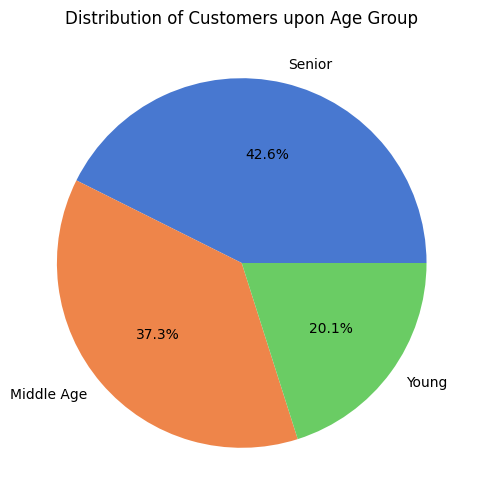

In [167]:
age_group_counts = customer_data['Age Group'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(age_group_counts , labels=age_group_counts.index, autopct = "%1.1f%%", colors = sns.color_palette('muted', len(age_group_counts)))
plt.title('Distribution of Customers upon Age Group')
plt.show()


Distribution of customers by Gender

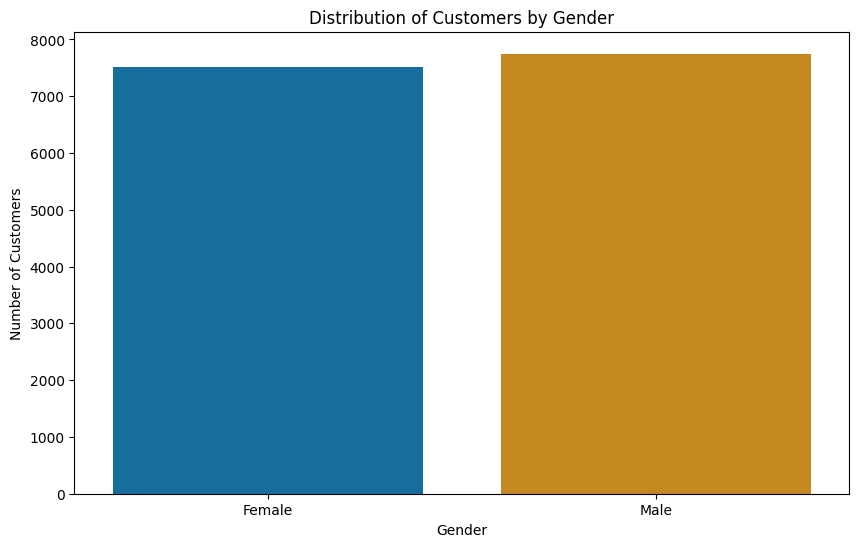

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=customer_data, palette='colorblind')
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

plt.show()

Distribution of Customers by City

In [164]:
city_counts = customer_data['City'].value_counts()

top_cities = city_counts.head(10)
top_cities

City
Toronto         204
New York        130
Los Angeles     119
Montreal         97
Chicago          92
Houston          86
Calgary          70
Dallas           68
Vancouver        62
Philadelphia     62
Name: count, dtype: int64

Top 10 Cities with Most Customers

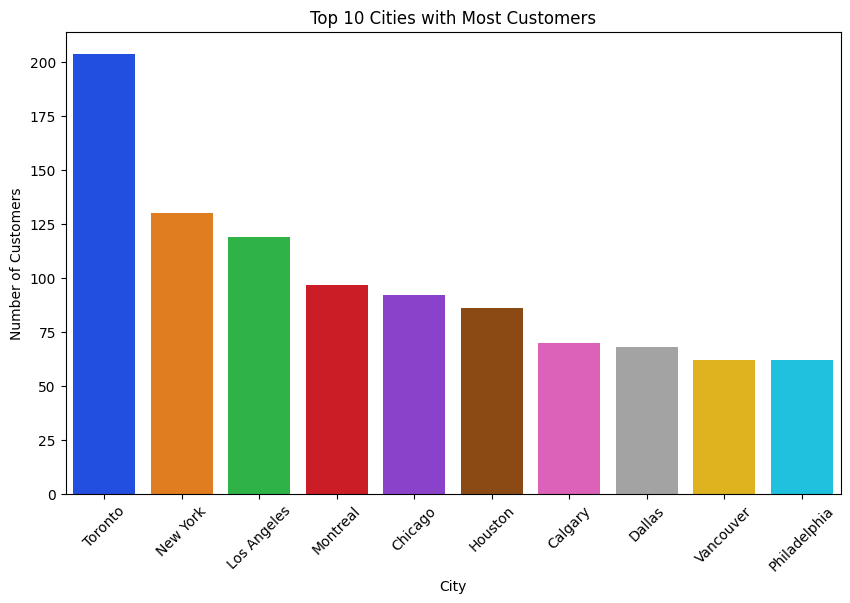

In [165]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='bright')
plt.title('Top 10 Cities with Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Distribution of Customers by State

In [169]:
state_counts = customer_data['State'].value_counts()
top_states = state_counts.head(10)
top_states

State
California          715
Ontario             644
Texas               522
New South Wales     430
New York            423
Freistaat Bayern    420
Illinois            368
Florida             348
Queensland          297
British Columbia    280
Name: count, dtype: int64

Top 10 States with most customers

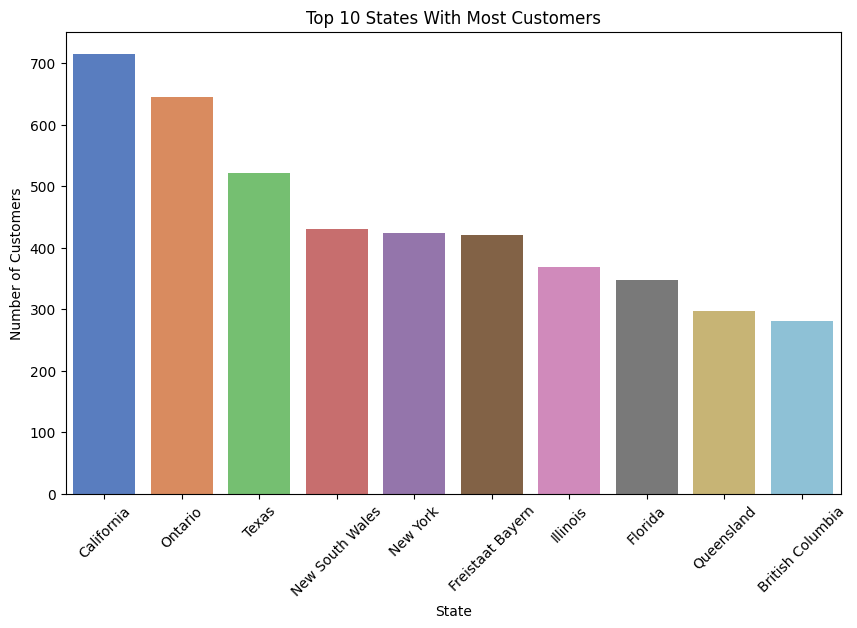

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='muted')
plt.title('Top 10 States With Most Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Distribution of Customers by Country

In [173]:
country_counts = customer_data['Country'].value_counts()

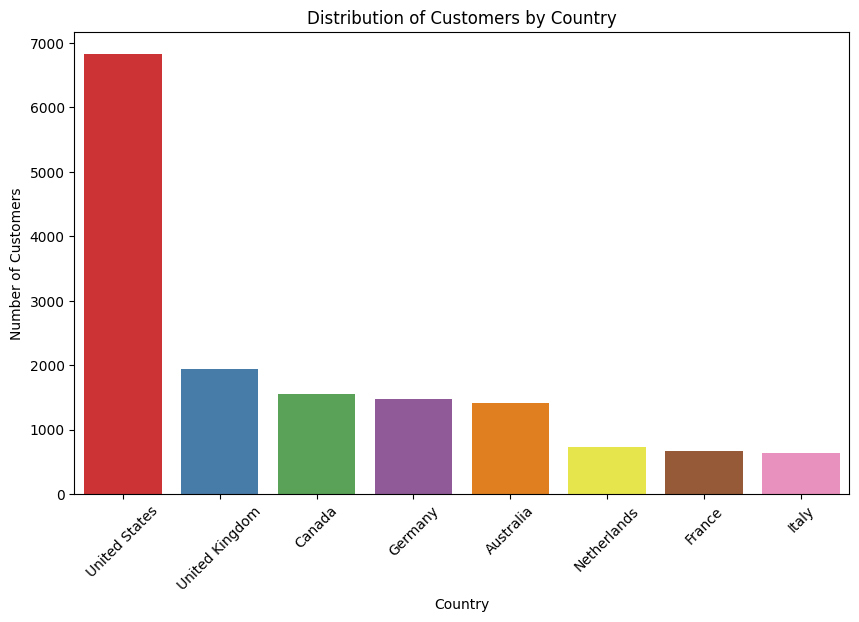

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Set1')
plt.title('Distribution of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Distribution of Customers by Continent

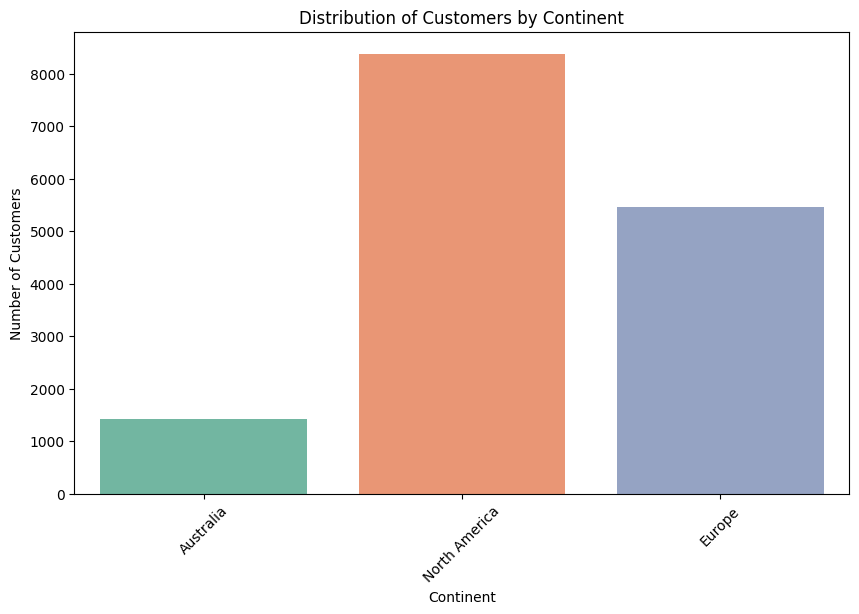

In [177]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=customer_data, palette='Set2')
plt.title('Distribution of Customers by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Key Customer Groups based on RFM Score calculated above

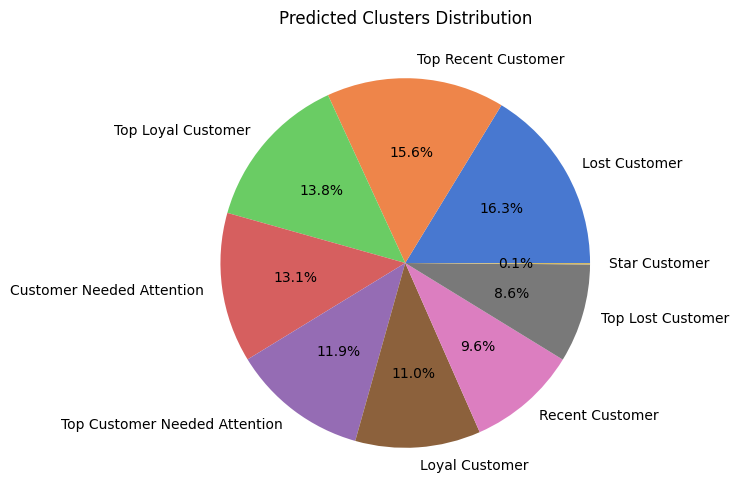

In [162]:
plt.figure(figsize=(12,6))
plt.pie(customer_rfm1['Segment'].value_counts(), labels=(customer_rfm1['Segment'].value_counts()).index, autopct = "%1.1f%%", colors = sns.color_palette('muted', len(customer_rfm1['Segment'].value_counts())))
plt.title('Predicted Clusters Distribution')
plt.show()

#### Sales Analysis

Sales of products in terms of quantity sold

In [178]:
sales_by_quantity = pd.DataFrame(sales_data.groupby('ProductKey')['Quantity'].sum().reset_index())
sales_by_quantity = sales_by_quantity.sort_values(by='Quantity', ascending=False)
sales_by_quantity.head()

,ProductKey,Quantity
442,444,550
456,458,538
432,434,521
422,424,521
423,425,520


In [179]:
sales_by_quantity_top5 = sales_by_quantity.head().reset_index().drop(columns=['index'])
products_by_quantity_top5 = sales_by_quantity_top5.merge(products_data, on='ProductKey', how='inner')
products_by_quantity_top5

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,444,550,WWI Desktop PC2.33 X2330 Black,Wide World Importers,Black,304.48,919.00,303,Desktops,3,Computers
1,458,538,WWI Desktop PC1.80 E1800 White,Wide World Importers,White,117.21,229.90,303,Desktops,3,Computers
2,434,521,Adventure Works Desktop PC2.30 MD230 White,Adventure Works,White,275.46,599.00,303,Desktops,3,Computers
3,424,521,Adventure Works Desktop PC1.60 ED160 Black,Adventure Works,Black,137.63,269.95,303,Desktops,3,Computers
4,425,520,Adventure Works Desktop PC1.80 ED180 Black,Adventure Works,Black,188.13,369.00,303,Desktops,3,Computers


In [180]:
sales_by_quantity_least5 = sales_by_quantity.tail().reset_index().drop(columns=['index'])
products_by_quantity_least5 = sales_by_quantity_least5.merge(products_data, on='ProductKey', how='inner')
products_by_quantity_least5

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,2306,1,Proseware Wall Lamp E0215 Blue,Proseware,Blue,61.17,119.99,806,Lamps,8,Home Appliances
1,2302,1,Proseware Floor Lamp X0115 Blue,Proseware,Blue,210.72,635.99,806,Lamps,8,Home Appliances
2,2431,1,"Litware 16"" White Oscillating Stand Fan E701 W...",Litware,White,14.83,29.09,808,Fans,8,Home Appliances
3,2243,1,WWI Wall Lamp E315 White,Wide World Importers,White,52.00,101.99,806,Lamps,8,Home Appliances
4,2192,1,Adventure Works Chandelier M8150 Black,Adventure Works,Black,123.47,268.50,806,Lamps,8,Home Appliances


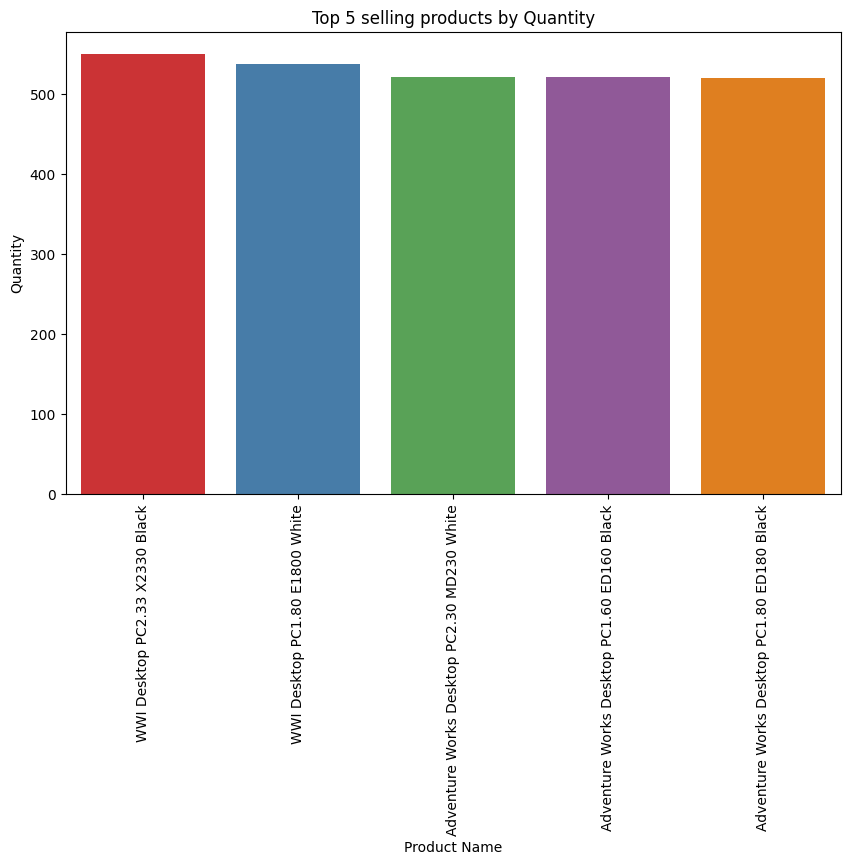

In [197]:
plt.figure(figsize=(10,6))
sns.barplot(products_by_quantity_top5, x = 'Product Name', y='Quantity', palette='Set1')
plt.title('Top 5 selling products by Quantity')
plt.xticks(rotation=90)
plt.show()

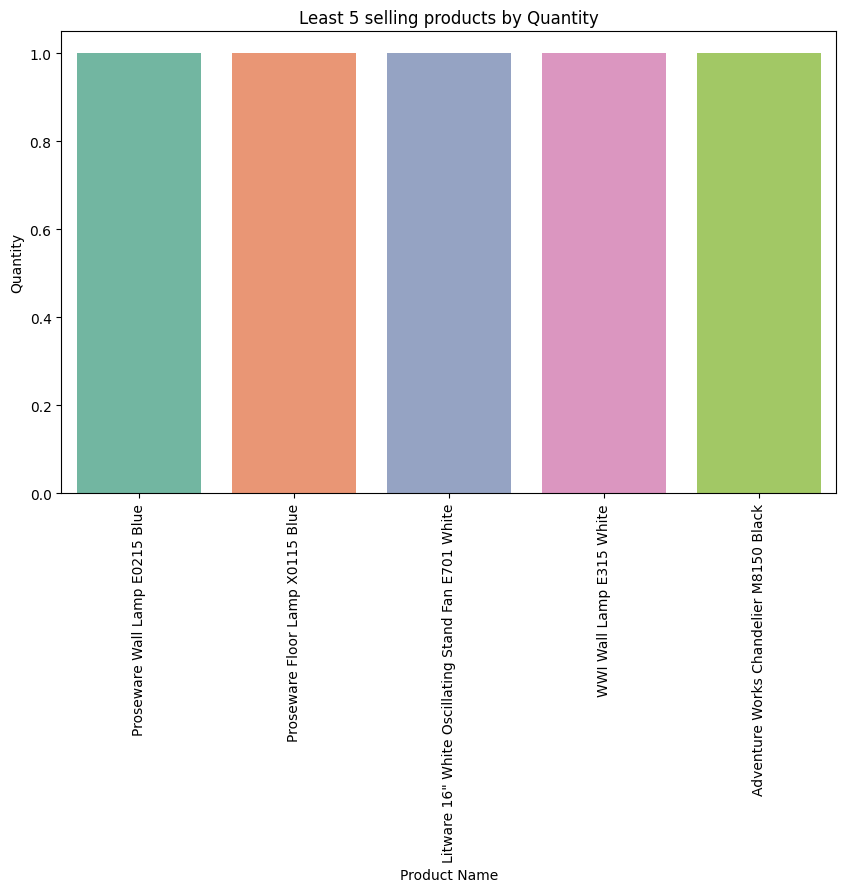

In [196]:
plt.figure(figsize=(10,6))
sns.barplot(products_by_quantity_least5, x = 'Product Name', y='Quantity', palette='Set2')
plt.title('Least 5 selling products by Quantity')
plt.xticks(rotation=90)
plt.show()

Sale of products in temrs of revenue generated

In [187]:
sales_by_revenue = sales_by_quantity.merge(products_data, on='ProductKey', how='inner')
sales_by_revenue.head()

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,444,550,WWI Desktop PC2.33 X2330 Black,Wide World Importers,Black,304.48,919.00,303,Desktops,3,Computers
1,458,538,WWI Desktop PC1.80 E1800 White,Wide World Importers,White,117.21,229.90,303,Desktops,3,Computers
2,434,521,Adventure Works Desktop PC2.30 MD230 White,Adventure Works,White,275.46,599.00,303,Desktops,3,Computers
3,424,521,Adventure Works Desktop PC1.60 ED160 Black,Adventure Works,Black,137.63,269.95,303,Desktops,3,Computers
4,425,520,Adventure Works Desktop PC1.80 ED180 Black,Adventure Works,Black,188.13,369.00,303,Desktops,3,Computers


In [188]:
sales_by_revenue['Revenue'] = sales_by_revenue['Quantity'] * sales_by_revenue['Unit Price USD']
sales_by_revenue.head()

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Revenue
0,444,550,WWI Desktop PC2.33 X2330 Black,Wide World Importers,Black,304.48,919.00,303,Desktops,3,Computers,505450.00
1,458,538,WWI Desktop PC1.80 E1800 White,Wide World Importers,White,117.21,229.90,303,Desktops,3,Computers,123686.20
2,434,521,Adventure Works Desktop PC2.30 MD230 White,Adventure Works,White,275.46,599.00,303,Desktops,3,Computers,312079.00
3,424,521,Adventure Works Desktop PC1.60 ED160 Black,Adventure Works,Black,137.63,269.95,303,Desktops,3,Computers,140643.95
4,425,520,Adventure Works Desktop PC1.80 ED180 Black,Adventure Works,Black,188.13,369.00,303,Desktops,3,Computers,191880.00


In [189]:
sales_by_revenue.groupby('Category')['Revenue'].mean()

Category
Audio                            27561.980348
Cameras and camcorders           17527.333387
Cell phones                      21697.513053
Computers                        31850.817591
Games and Toys                    4366.442349
Home Appliances                  16947.376122
Music, Movies and Audio Books    34788.960444
TV and Video                     26827.975973
Name: Revenue, dtype: float64

In [190]:
sales_by_revenue = sales_by_revenue.sort_values(by='Revenue', ascending=False)
sales_by_revenue_top5 = sales_by_revenue.head()
sales_by_revenue_least5 = sales_by_revenue.tail()

Top 5 Revenue generated products

In [191]:
sales_by_revenue_top5

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Revenue
0,444,550,WWI Desktop PC2.33 X2330 Black,Wide World Importers,Black,304.48,919.0,303,Desktops,3,Computers,505450.0
13,416,481,Adventure Works Desktop PC2.33 XD233 Silver,Adventure Works,Silver,321.05,969.0,303,Desktops,3,Computers,466089.0
16,428,479,Adventure Works Desktop PC2.33 XD233 Brown,Adventure Works,Brown,321.05,969.0,303,Desktops,3,Computers,464151.0
22,422,462,Adventure Works Desktop PC2.33 XD233 Black,Adventure Works,Black,321.05,969.0,303,Desktops,3,Computers,447678.0
28,433,451,Adventure Works Desktop PC2.33 XD233 White,Adventure Works,White,321.05,969.0,303,Desktops,3,Computers,437019.0


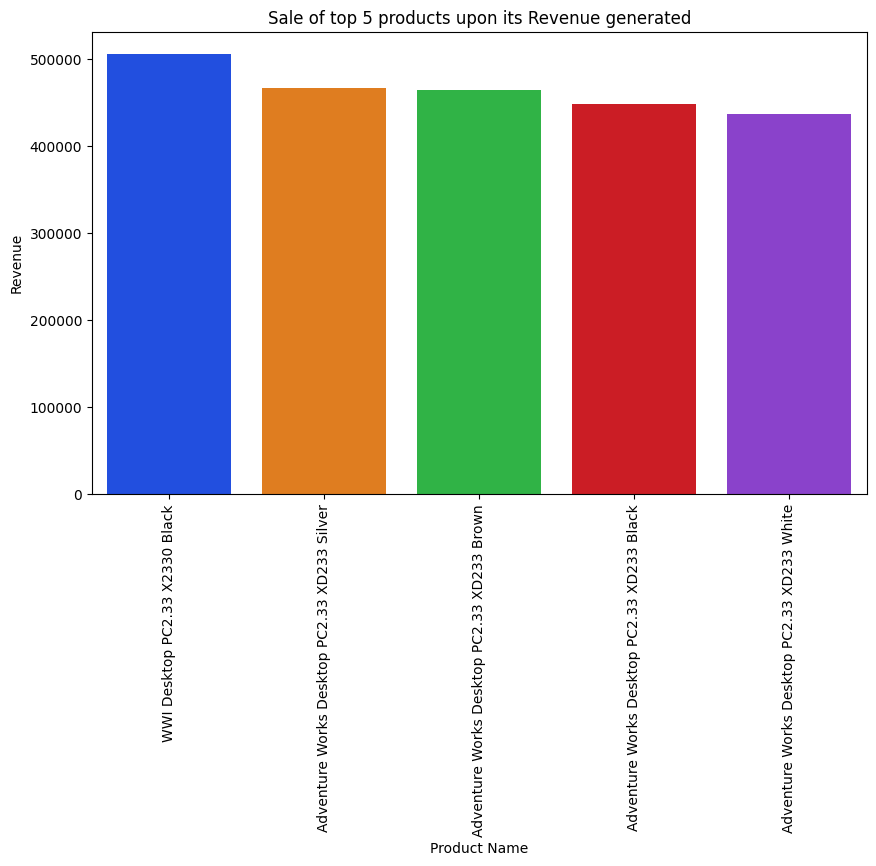

In [195]:
plt.figure(figsize=(10,6))
sns.barplot(sales_by_revenue_top5, x = 'Product Name', y = 'Revenue', palette='bright')
plt.title('Sale of top 5 products upon its Revenue generated')
plt.xticks(rotation=90)
plt.show()

Least 5 Revenue generated products

In [192]:
sales_by_revenue_least5

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Revenue
1767,919,27,SV USB Data Cable E600 Pink,Southridge Video,Pink,0.48,0.95,308,Computers Accessories,3,Computers,25.65
1907,922,23,SV USB Data Cable E600 Grey,Southridge Video,Grey,0.48,0.95,308,Computers Accessories,3,Computers,21.85
2423,2445,4,Litware 80mm Dual Ball Bearing Case Fan E1001 ...,Litware,Green,2.54,4.99,808,Fans,8,Home Appliances,19.96
2356,926,8,SV USB Sync Charge Cable E700 Silver,Southridge Video,Silver,1.01,1.99,308,Computers Accessories,3,Computers,15.92
2108,921,16,SV USB Data Cable E600 Silver,Southridge Video,Silver,0.48,0.95,308,Computers Accessories,3,Computers,15.20


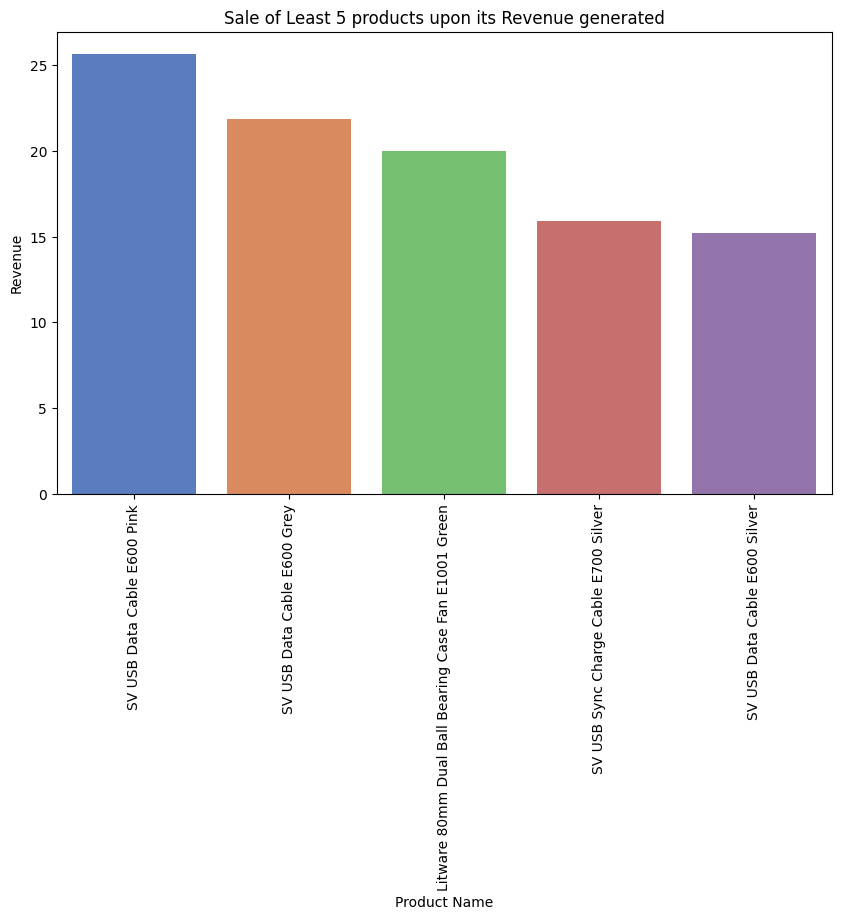

In [194]:
plt.figure(figsize=(10,6))
sns.barplot(sales_by_revenue_least5, x = 'Product Name', y = 'Revenue', palette='muted')
plt.xticks(rotation=90)
plt.title('Sale of Least 5 products upon its Revenue generated')
plt.show()

Sales by stores

In [193]:
sales_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,Year,Month,Date,Day
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,2016,1,1,Friday
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,2016,1,1,Friday
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,2016,1,1,Friday
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,2016,1,1,Friday
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,2016,1,1,Friday


In [198]:
top_stores = sales_data.groupby('StoreKey')['Quantity'].sum().reset_index()
top_stores = top_stores.sort_values(by='Quantity', ascending=False)

In [199]:
top_5_stores = top_stores.head()
top_5_stores

,StoreKey,Quantity
0,0,41311
7,9,4894
48,55,4826
44,50,4773
52,61,4771


In [200]:
least_5_stores = top_stores.tail()
least_5_stores

,StoreKey,Quantity
14,17,626
15,18,607
10,13,592
11,14,361
2,2,61


Maximum Sales - Store wiht StoreKey-0 which is 'Online' has the maximum sales

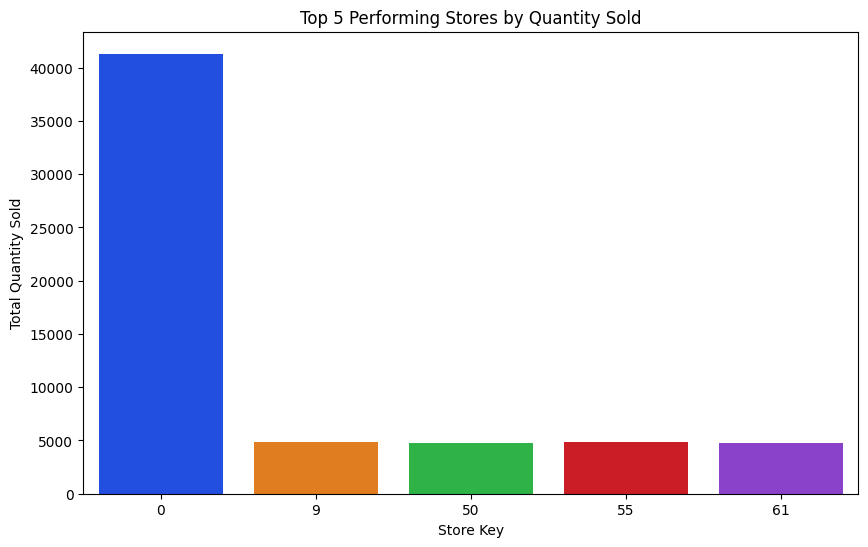

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreKey', y='Quantity', data=top_5_stores, palette='bright')
plt.title('Top 5 Performing Stores by Quantity Sold')
plt.xlabel('Store Key')
plt.ylabel('Total Quantity Sold')
plt.show()

Least Sales - Store with StoreKey-2 has the least sales

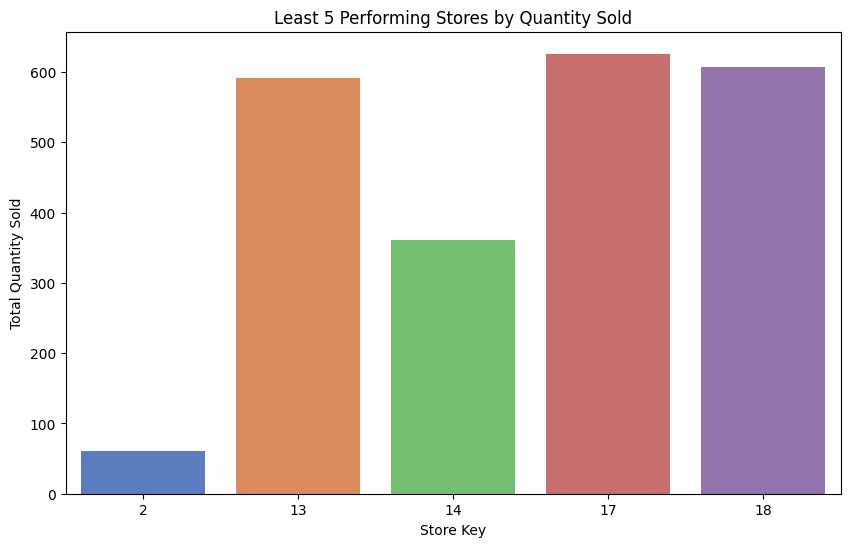

In [190]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreKey', y='Quantity', data=least_5_stores, palette='muted')
plt.title('Least 5 Performing Stores by Quantity Sold')
plt.xlabel('Store Key')
plt.ylabel('Total Quantity Sold')
plt.show()

In [202]:
sales_exchange = sales_data.merge(exchange_rates_data,left_on=['Currency Code', 'Order Date'], right_on=['Currency', 'Date'], how='left')

In [204]:
sale_price = sales_exchange.merge(products_data, on='ProductKey', how='inner' )
sale_price.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Exchange,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,1.3884,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,1.0000,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,...,1.0000,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,...,1.3884,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,...,1.3884,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers


In [206]:
sale_price['Unit Price USD']

0         68.00
1        427.00
2        665.94
3        322.00
4        326.00
          ...  
62879    139.00
62880    120.00
62881    109.99
62882     70.13
62883    679.00
Name: Unit Price USD, Length: 62884, dtype: float64

In [207]:
sale_price['Total Amount'] = sale_price['Quantity'] * sale_price['Unit Price USD']
sale_price['Total Amount']

0          68.00
1         854.00
2         665.94
3        2254.00
4         326.00
          ...   
62879     417.00
62880     480.00
62881     219.98
62882     140.26
62883    4753.00
Name: Total Amount, Length: 62884, dtype: float64

In [208]:
sale_price.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,68.00
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,854.00
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,...,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,665.94
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,...,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,2254.00
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,...,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,326.00


In [209]:
totalamount_bill = pd.DataFrame(sale_price.groupby('Order Number')['Total Amount'].sum().reset_index())
totalamount_bill.columns = ['Order Number', 'Total BillAmount']
totalamount_bill.head()

,Order Number,Total BillAmount
0,366000,68.00
1,366001,1519.94
2,366002,5164.00
3,366004,10063.20
4,366005,1876.00


In [210]:
totalamount_bill_final = totalamount_bill.merge(sale_price, on='Order Number', how='inner')
totalamount_bill_final.head()

,Order Number,Total BillAmount,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,...,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount
0,366000,68.00,1,2016-01-01,NaT,265598,10,1304,1,CAD,...,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,68.00
1,366001,1519.94,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,...,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,854.00
2,366001,1519.94,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,...,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,665.94
3,366002,5164.00,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,...,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,2254.00
4,366002,5164.00,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,...,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,326.00


In [211]:
totalamount_bill_final = totalamount_bill_final.drop(columns=['Line Item', 'Order Date',
       'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Order Type', 'Year', 'Month', 'Date_x', 'Day',
       'Date_y', 'Currency','Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category','Total Amount'])
totalamount_bill_final.head()

,Order Number,Total BillAmount,Currency Code,Exchange
0,366000,68.00,CAD,1.3884
1,366001,1519.94,USD,1.0000
2,366001,1519.94,USD,1.0000
3,366002,5164.00,CAD,1.3884
4,366002,5164.00,CAD,1.3884


In [212]:
totalamount_bill_final = totalamount_bill_final[~totalamount_bill_final.duplicated()]
totalamount_bill_final

,Order Number,Total BillAmount,Currency Code,Exchange
0,366000,68.00,CAD,1.3884
1,366001,1519.94,USD,1.0000
3,366002,5164.00,CAD,1.3884
6,366004,10063.20,GBP,0.6742
8,366005,1876.00,EUR,0.9185
...,...,...,...,...
62872,2243028,29.97,USD,1.0000
62873,2243029,4765.86,EUR,0.8238
62879,2243030,417.00,USD,1.0000
62880,2243031,480.00,EUR,0.8238


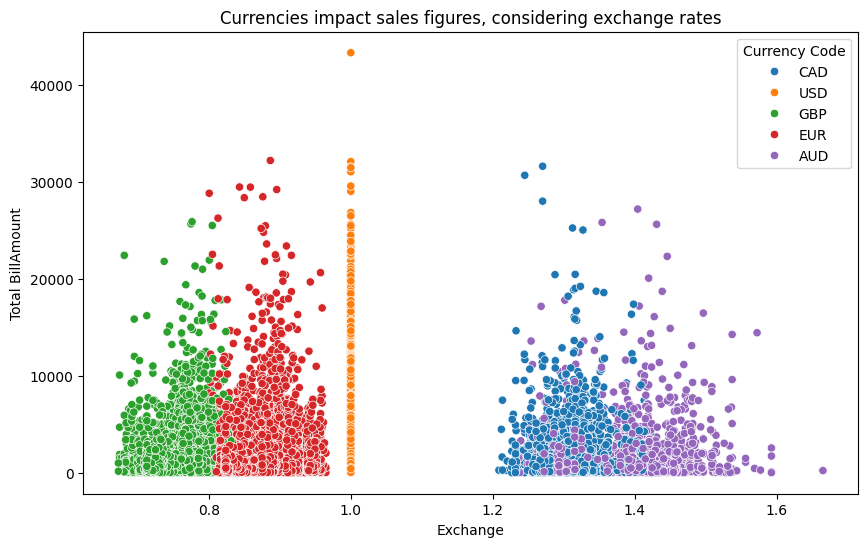

In [213]:
plt.figure(figsize=(10,6))
sns.scatterplot(totalamount_bill_final, y='Total BillAmount', x='Exchange', hue='Currency Code' )
plt.title('Currencies impact sales figures, considering exchange rates')
plt.show()

From the above scatter plot we can come to an understanding that most of the bill amount falls under $20000
Also, the exchange rate is less when sale is high




Seasonal and Monthly Sales Analysis

In [214]:
seasonal_sales = totalamount_bill_final.merge(sales_data, on='Order Number', how='inner')
seasonal_sales.head()

,Order Number,Total BillAmount,Currency Code_x,Exchange,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code_y,Order Type,Year,Month,Date,Day
0,366000,68.00,CAD,1.3884,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,2016,1,1,Friday
1,366001,1519.94,USD,1.0000,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,2016,1,1,Friday
2,366001,1519.94,USD,1.0000,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,2016,1,1,Friday
3,366002,5164.00,CAD,1.3884,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,2016,1,1,Friday
4,366002,5164.00,CAD,1.3884,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,2016,1,1,Friday


In [215]:
season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

seasonal_sales['Seasons'] = seasonal_sales['Month'].map(season)
seasonal_sales.head()

,Order Number,Total BillAmount,Currency Code_x,Exchange,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code_y,Order Type,Year,Month,Date,Day,Seasons
0,366000,68.00,CAD,1.3884,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,2016,1,1,Friday,Winter
1,366001,1519.94,USD,1.0000,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,2016,1,1,Friday,Winter
2,366001,1519.94,USD,1.0000,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,2016,1,1,Friday,Winter
3,366002,5164.00,CAD,1.3884,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,2016,1,1,Friday,Winter
4,366002,5164.00,CAD,1.3884,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,2016,1,1,Friday,Winter


In [216]:
month = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

seasonal_sales['Month'] = seasonal_sales['Month'].map(month)
seasonal_sales.head()

,Order Number,Total BillAmount,Currency Code_x,Exchange,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code_y,Order Type,Year,Month,Date,Day,Seasons
0,366000,68.00,CAD,1.3884,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,2016,January,1,Friday,Winter
1,366001,1519.94,USD,1.0000,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,2016,January,1,Friday,Winter
2,366001,1519.94,USD,1.0000,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,2016,January,1,Friday,Winter
3,366002,5164.00,CAD,1.3884,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,2016,January,1,Friday,Winter
4,366002,5164.00,CAD,1.3884,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,2016,January,1,Friday,Winter


Total sales over each season

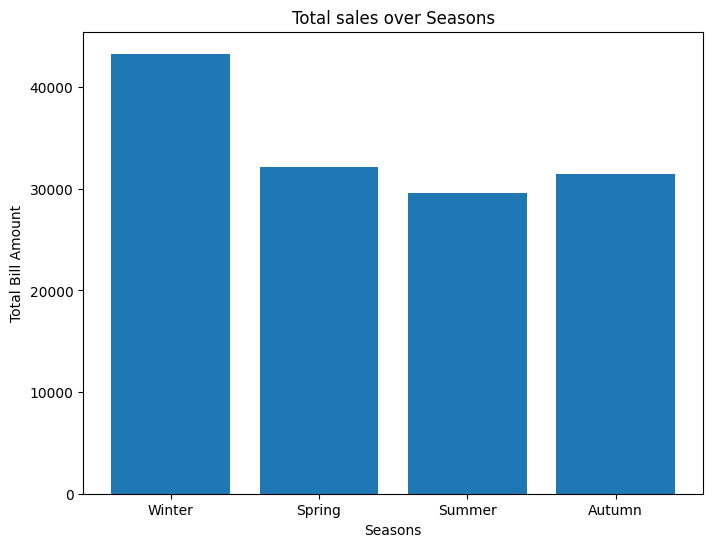

In [219]:
plt.figure(figsize=(10,6))
plt.bar(x=seasonal_sales['Seasons'],height=seasonal_sales['Total BillAmount'])
plt.title('Total sales over Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Bill Amount')
plt.show()

Total sales over each months

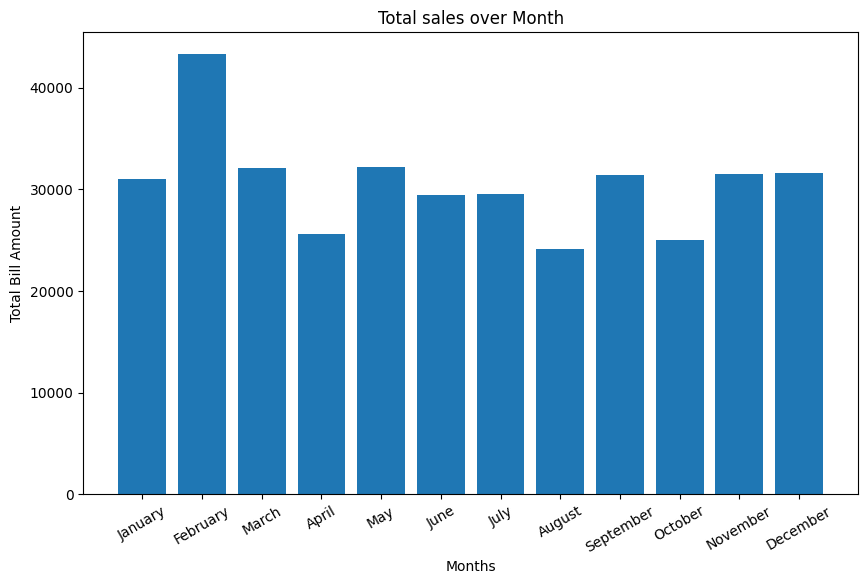

In [220]:
plt.figure(figsize=(10,6))
plt.bar(x=seasonal_sales['Month'],height=seasonal_sales['Total BillAmount'])
plt.title('Total sales over Month')
plt.xlabel('Months')
plt.ylabel('Total Bill Amount')
plt.xticks(rotation=30)
plt.show()

#### Product Analysis

Product Popularity:

Top 5 sold products

In [221]:
top_5_products = sales_data['ProductKey'].value_counts().head(5)
top_5_products_df = top_5_products.reset_index()
top_5_products_df.columns = ['ProductKey', 'Count']
top_5_products_df

,ProductKey,Count
0,423,162
1,446,158
2,434,158
3,458,158
4,448,157


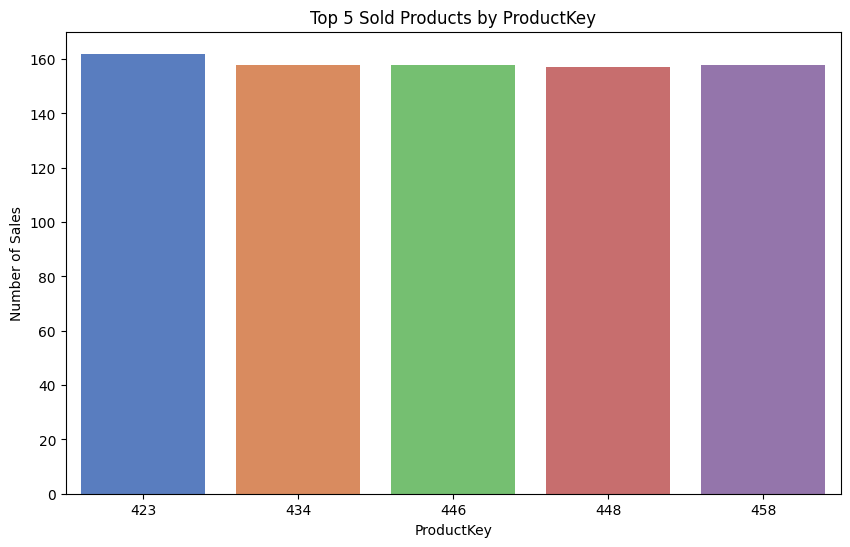

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductKey', y='Count', data=top_5_products_df, palette='muted')
plt.title('Top 5 Sold Products by ProductKey')
plt.xlabel('ProductKey')
plt.ylabel('Number of Sales')
plt.show()

Least 5 sold products

In [223]:
least_5_products = sales_data['ProductKey'].value_counts().tail(5)
least_5_products_df = least_5_products.reset_index()
least_5_products_df.columns = ['ProductKey', 'Count']
least_5_products_df

,ProductKey,Count
0,2306,1
1,2346,1
2,2232,1
3,2243,1
4,193,1


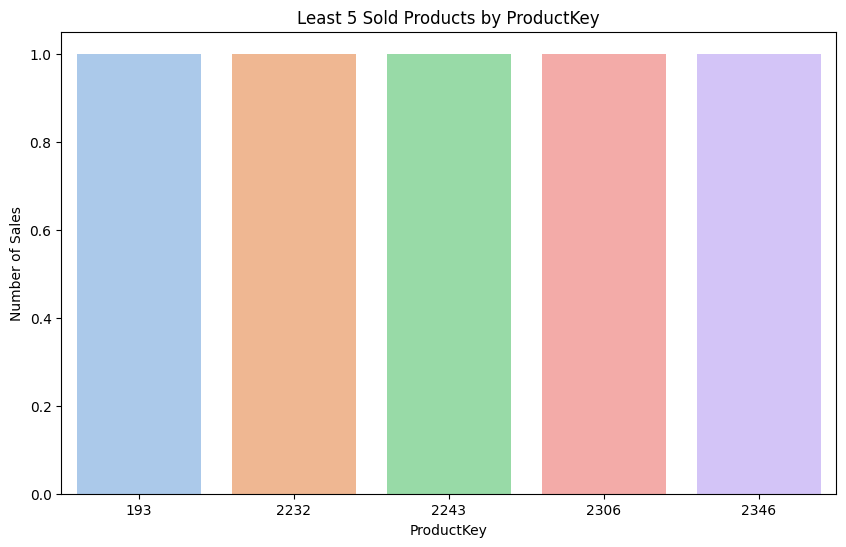

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductKey', y='Count', data=least_5_products_df, palette='pastel')
plt.title('Least 5 Sold Products by ProductKey')
plt.xlabel('ProductKey')
plt.ylabel('Number of Sales')
plt.show()

Category Analysis:

Sales performance across different product based on categories

In [230]:
products_category = Sales_Products_final.groupby('Category')['Quantity'].sum().reset_index()
products_category = products_category.sort_values(by='Quantity', ascending=False)
products_category_top5 = products_category.head()
products_category_least5 = products_category.tail()

In [231]:
products_category_top5

,Category,Quantity
3,Computers,44151
2,Cell phones,31477
6,"Music, Movies and Audio Books",28802
0,Audio,23490
4,Games and Toys,22591


In [232]:
products_category_least5

,Category,Quantity
0,Audio,23490
4,Games and Toys,22591
5,Home Appliances,18401
1,Cameras and camcorders,17609
7,TV and Video,11236


Sale performance of top 5 products by category

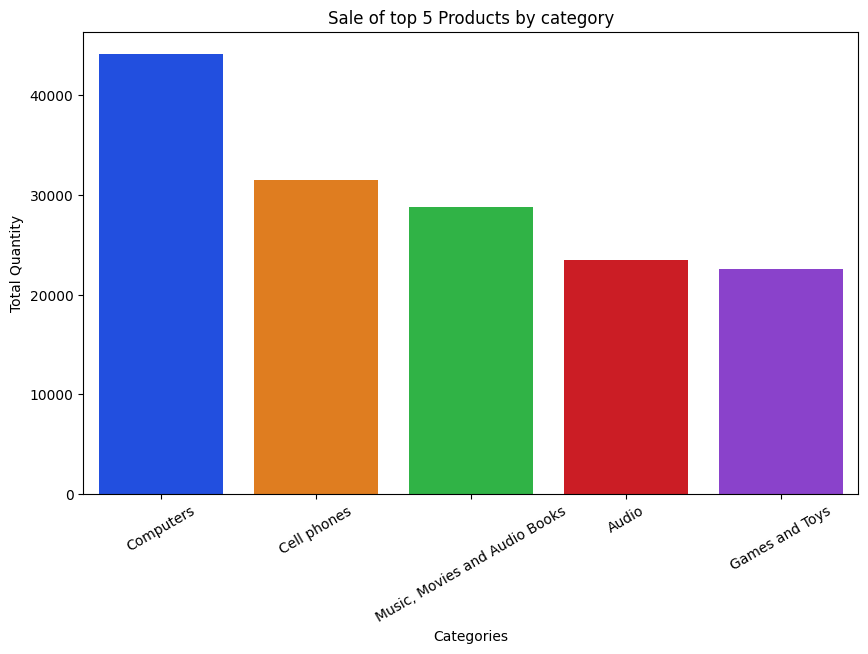

In [237]:
plt.figure(figsize=(10,6))
sns.barplot(products_category_top5, x='Category', y='Quantity', palette='bright')
plt.title('Sale of top 5 Products by category')
plt.xlabel('Categories')
plt.ylabel('Total Quantity')
plt.xticks(rotation=30)
plt.show()

Sale Performance of least 5 products upon its categories

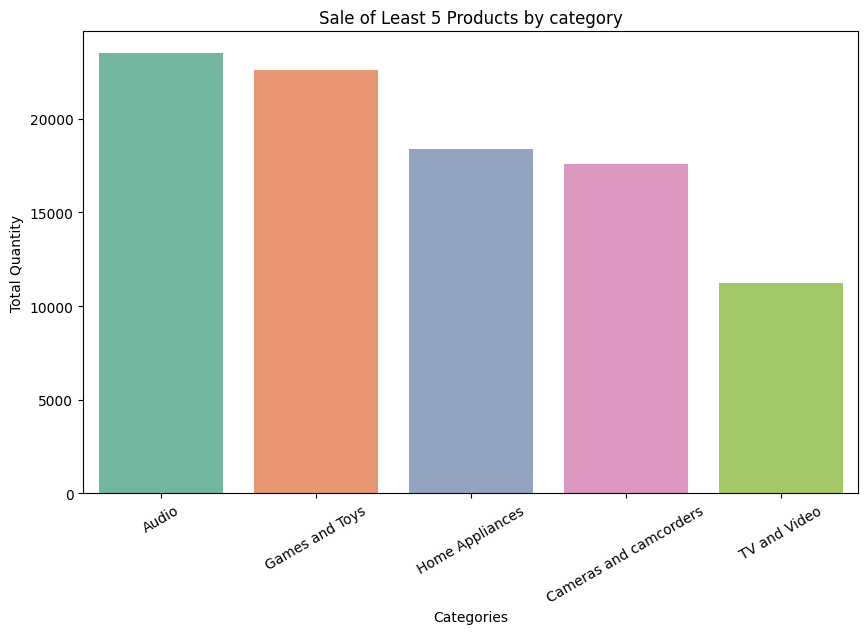

In [238]:
plt.figure(figsize=(10,6))
sns.barplot(products_category_least5, x='Category', y='Quantity', palette='Set2')
plt.title('Sale of Least 5 Products by category')
plt.xlabel('Categories')
plt.ylabel('Total Quantity')
plt.xticks(rotation=30)
plt.show()

Sales performance across different products based on Sub-categories

In [239]:
cats = list(products_category_top5['Category'])
cats

['Computers',
 'Cell phones',
 'Music, Movies and Audio Books',
 'Audio',
 'Games and Toys']

In [240]:
filtered_data = sales_by_revenue[sales_by_revenue['Category'].isin(cats)]
filtered_data 

,ProductKey,Quantity,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Revenue
0,444,550,WWI Desktop PC2.33 X2330 Black,Wide World Importers,Black,304.48,919.00,303,Desktops,3,Computers,505450.00
13,416,481,Adventure Works Desktop PC2.33 XD233 Silver,Adventure Works,Silver,321.05,969.00,303,Desktops,3,Computers,466089.00
16,428,479,Adventure Works Desktop PC2.33 XD233 Brown,Adventure Works,Brown,321.05,969.00,303,Desktops,3,Computers,464151.00
22,422,462,Adventure Works Desktop PC2.33 XD233 Black,Adventure Works,Black,321.05,969.00,303,Desktops,3,Computers,447678.00
28,433,451,Adventure Works Desktop PC2.33 XD233 White,Adventure Works,White,321.05,969.00,303,Desktops,3,Computers,437019.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,920,32,SV USB Data Cable E600 Black,Southridge Video,Black,0.48,0.95,308,Computers Accessories,3,Computers,30.40
1767,919,27,SV USB Data Cable E600 Pink,Southridge Video,Pink,0.48,0.95,308,Computers Accessories,3,Computers,25.65
1907,922,23,SV USB Data Cable E600 Grey,Southridge Video,Grey,0.48,0.95,308,Computers Accessories,3,Computers,21.85
2356,926,8,SV USB Sync Charge Cable E700 Silver,Southridge Video,Silver,1.01,1.99,308,Computers Accessories,3,Computers,15.92


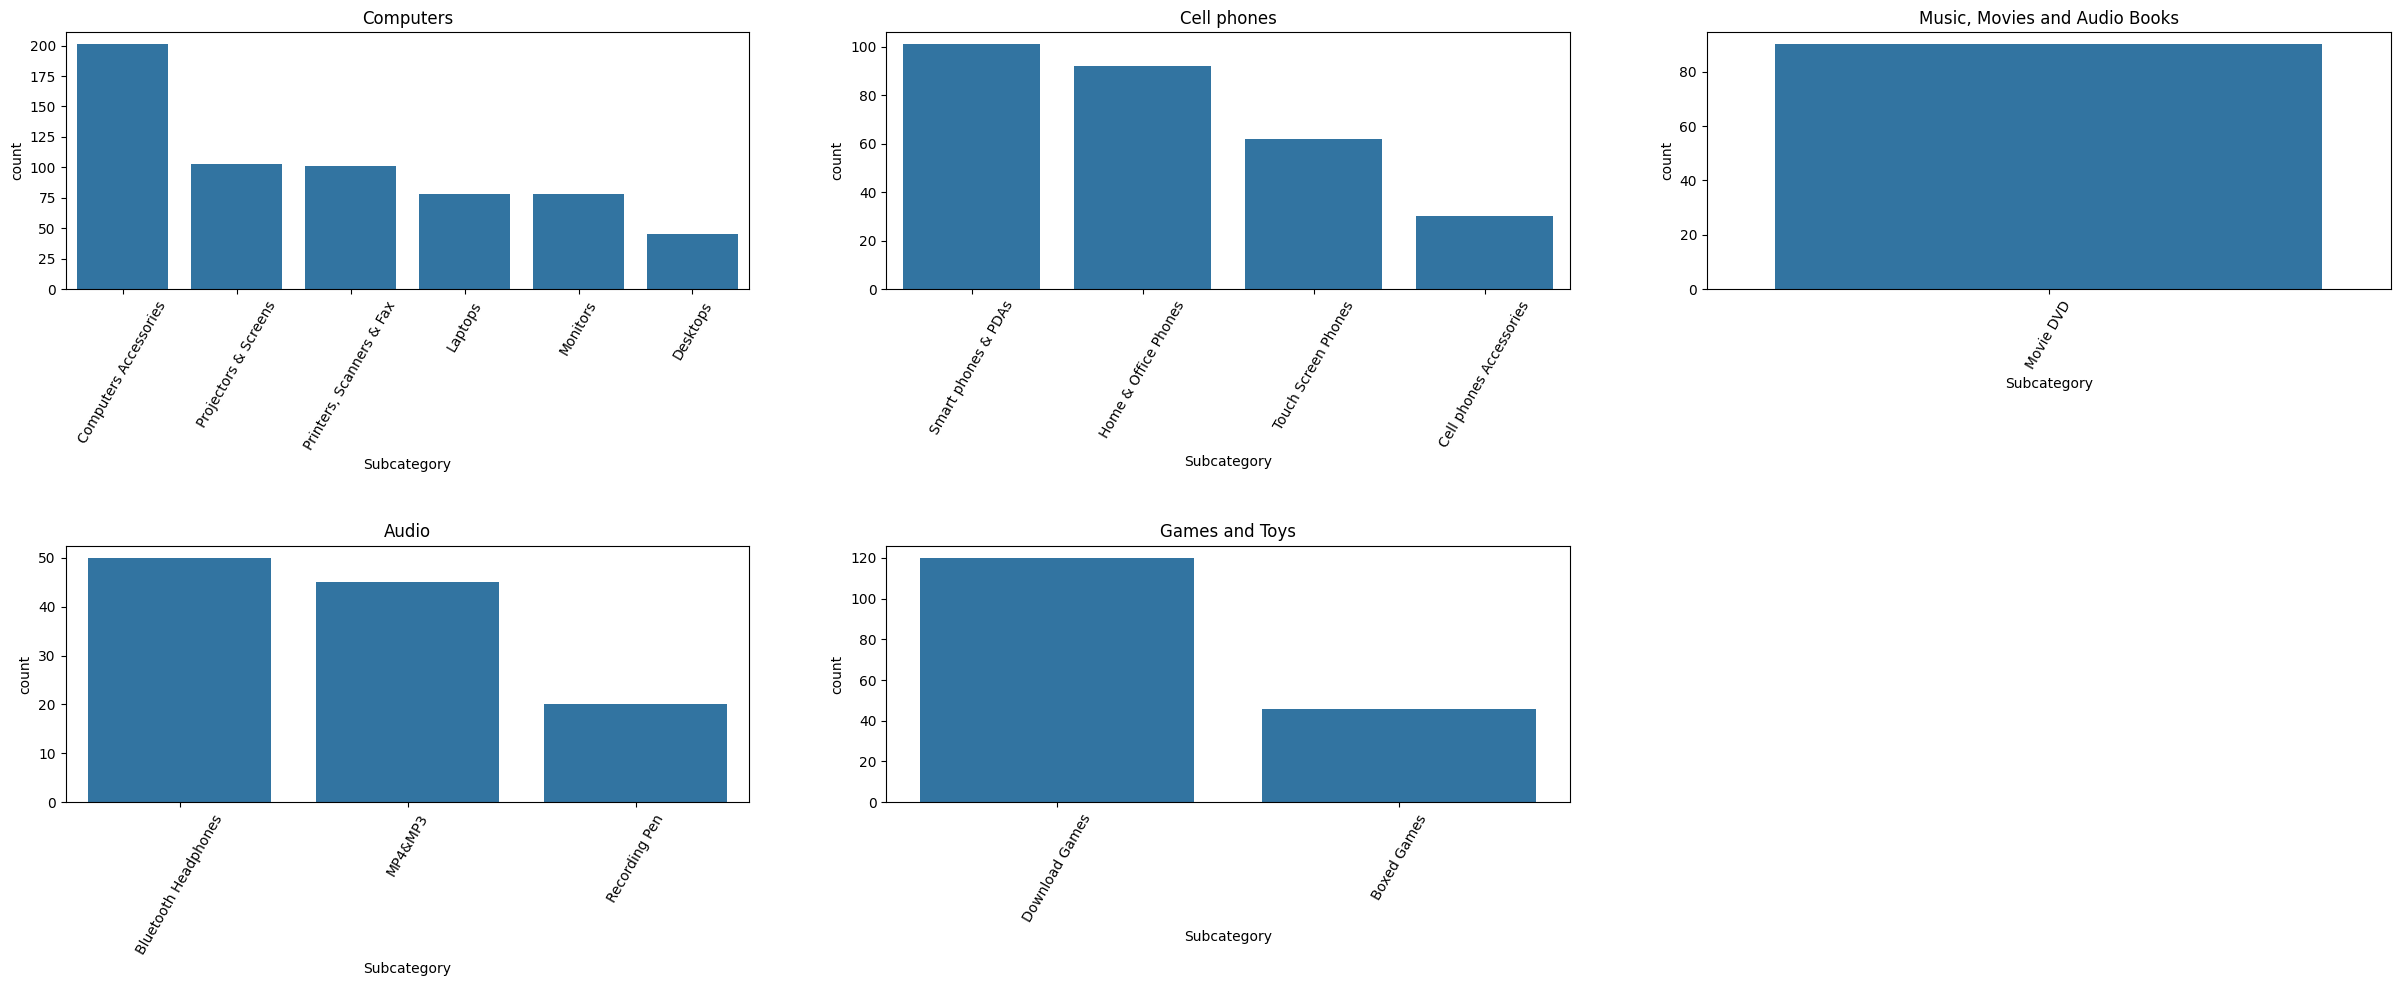

In [241]:
n = 1
plt.figure(figsize=(30,10))
for i in cats:
    df = pd.DataFrame(filtered_data[filtered_data['Category'] == i]['Subcategory'].value_counts())
    plt.subplot(2,3,n)
    plt.subplots_adjust(wspace=0.2, hspace=1)
    plt.xticks(rotation = 60)
    sns.barplot(data=df, x='Subcategory', y='count')
    plt.title(i)
    n+=1
plt.show()

#### Store Analysis

Store Performance:

Store Performance based on sales

In [242]:
sale_prods.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,68.0
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.0,402,Digital SLR Cameras,4,Cameras and camcorders,854.0


In [243]:
store_sales_prod = sale_prods.merge(stores_data, on='StoreKey', how='inner')
store_sales_prod.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount,Country,State,Square Meters,Open Date
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,68.0,Canada,Nunavut,1210.0,2015-04-04
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,427.0,402,Digital SLR Cameras,4,Cameras and camcorders,854.0,Online,Online,0.0,2010-01-01


In [244]:
revenue_per_store = pd.DataFrame(store_sales_prod.groupby('StoreKey')['Total Amount'].sum())

In [245]:
revenue_per_store = revenue_per_store[revenue_per_store.index != 0]

In [246]:
top5_revenued_stores = revenue_per_store.sort_values(by='Total Amount', ascending=False).head()
least5_revenued_stores = revenue_per_store.sort_values(by='Total Amount', ascending=False).tail()

Top 5 stores by revenue genreated

In [247]:
top5_revenued_stores

,Total Amount
StoreKey,
55,1417885.41
50,1394738.06
54,1384396.24
9,1336150.06
57,1325611.89


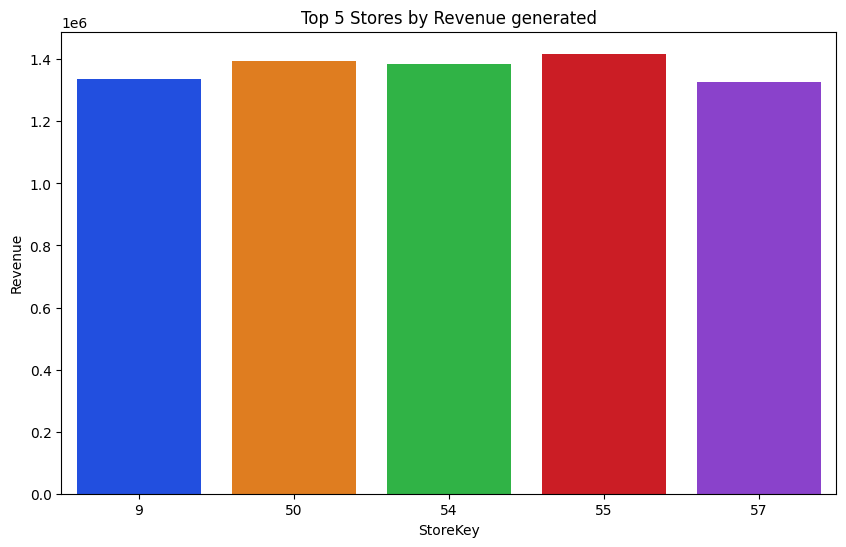

In [249]:
plt.figure(figsize=(10,6))
sns.barplot(data = top5_revenued_stores, x='StoreKey', y='Total Amount', palette='bright')
plt.title('Top 5 Stores by Revenue generated')
plt.ylabel('Revenue')
plt.show()

Least 5 stores by revenue genreated

In [250]:
least5_revenued_stores

,Total Amount
StoreKey,
12,183091.04
17,159607.50
13,150925.12
14,105714.05
2,15175.99


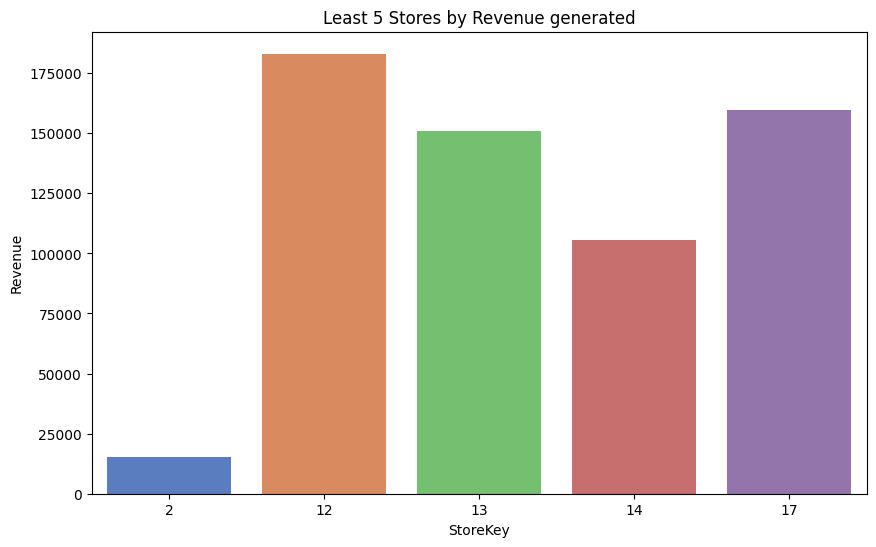

In [251]:
plt.figure(figsize=(10,6))
sns.barplot(data = least5_revenued_stores, x='StoreKey', y='Total Amount', palette='muted')
plt.title('Least 5 Stores by Revenue generated')
plt.ylabel('Revenue')
plt.show()

Store performance based on size

In [252]:
stores_data.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09


In [253]:
stores_size = stores_data.sort_values(by='Square Meters', ascending=False)

Dropping the storeKey with 0 which is 'Online' since it has no square meters

In [254]:
stores_size = stores_size[stores_size['StoreKey'] != 0]

In [255]:
stores_size[stores_size['StoreKey'] == 0]

,StoreKey,Country,State,Square Meters,Open Date


In [256]:
stores_size.tail()

,StoreKey,Country,State,Square Meters,Open Date
16,17,France,Martinique,350.0,2007-07-08
13,14,France,Franche-Comté,350.0,2009-12-15
11,12,France,Basse-Normandie,350.0,2012-06-06
17,18,France,Mayotte,310.0,2012-08-08
12,13,France,Corse,245.0,2013-06-07


In [257]:
stores_size_top5 = stores_size.head()
stores_size_least5 = stores_size.tail()

In [258]:
stores_size_top5

,StoreKey,Country,State,Square Meters,Open Date
7,8,Canada,Newfoundland and Labrador,2105.0,2014-07-02
36,37,United Kingdom,Ayrshire,2100.0,2005-03-04
29,30,Italy,Pesaro,2100.0,2008-01-12
40,41,United Kingdom,Fermanagh,2100.0,2013-06-07
38,39,United Kingdom,Blaenau Gwent,2100.0,2009-06-03


In [259]:
stores_size_least5

,StoreKey,Country,State,Square Meters,Open Date
16,17,France,Martinique,350.0,2007-07-08
13,14,France,Franche-Comté,350.0,2009-12-15
11,12,France,Basse-Normandie,350.0,2012-06-06
17,18,France,Mayotte,310.0,2012-08-08
12,13,France,Corse,245.0,2013-06-07


Top 5 stores based on its square meters

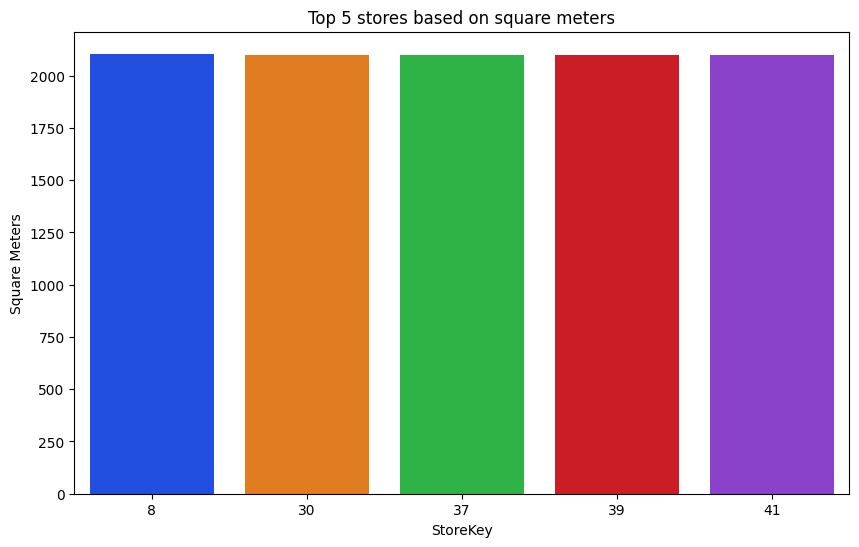

In [260]:
plt.figure(figsize=(10,6))
sns.barplot(stores_size_top5, x='StoreKey', y='Square Meters', palette='bright')
plt.title('Top 5 stores based on square meters')
plt.show()

Least 5 stores based on its square meters

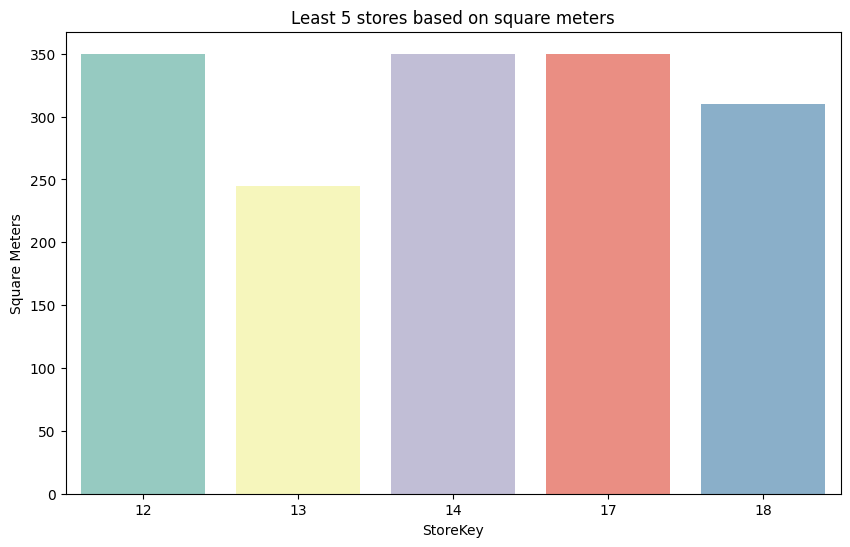

In [262]:
plt.figure(figsize=(10,6))
sns.barplot(stores_size_least5, x='StoreKey', y='Square Meters', palette='Set3')
plt.title('Least 5 stores based on square meters')
plt.show()

Geographical Analysis:

Sales by regions

High performing Countries

In [263]:
store_sales_prod = store_sales_prod[store_sales_prod['Country'] != 'Online']

In [264]:
revenue_per_country = pd.DataFrame(store_sales_prod.groupby('Country')['Total Amount'].sum())
top5_performing_countries = revenue_per_country.sort_values(by='Total Amount', ascending=False).head()

In [265]:
top5_performing_countries

,Total Amount
Country,
United States,23764425.86
United Kingdom,5749769.78
Germany,4246279.22
Canada,3611561.79
Australia,2099141.07


High Performing regions based on countries

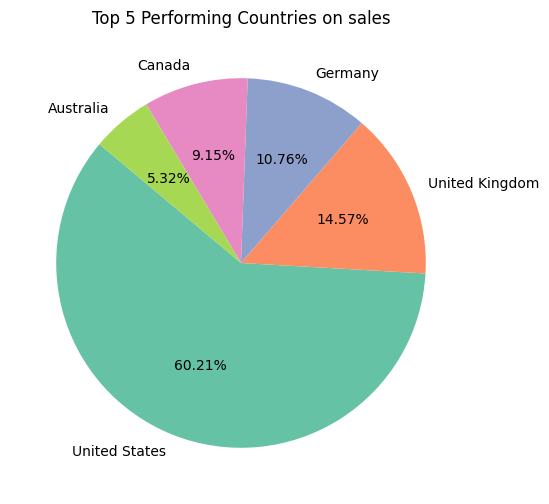

In [268]:
total_amounts = top5_performing_countries['Total Amount']
countires = top5_performing_countries.index

plt.figure(figsize=(10,6))
plt.pie(total_amounts, labels=countires, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top 5 Performing Countries on sales')
plt.show()

Top Performing states based in top 3 performing countries

In [269]:
store_sales_prod.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount,Country,State,Square Meters,Open Date
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,In-Store,...,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,68.0,Canada,Nunavut,1210.0,2015-04-04
6,366004,1,2016-01-01,NaT,1107461,38,163,6,GBP,In-Store,...,1592.2,201,Televisions,2,TV and Video,9553.2,United Kingdom,Belfast,1800.0,2015-04-04


Top 5 performing states in United States


In [270]:
us_stores = store_sales_prod[store_sales_prod['Country'] == 'United States']
us_stores.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount,Country,State,Square Meters,Open Date
9,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD,In-Store,...,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",57.99,United States,Alaska,1190.0,2015-01-01
10,366007,2,2016-01-01,NaT,2035771,43,666,5,USD,In-Store,...,163.00,306,"Printers, Scanners & Fax",3,Computers,815.00,United States,Alaska,1190.0,2015-01-01


In [271]:
us_highrevenue_states = pd.DataFrame(us_stores.groupby('State')['Total Amount'].sum())
us_highrevenue_states = us_highrevenue_states.sort_values(by='Total Amount', ascending=False).head()
us_highrevenue_states


,Total Amount
State,
Nevada,1417885.41
Kansas,1394738.06
Nebraska,1384396.24
New Mexico,1325611.89
Connecticut,1318787.92


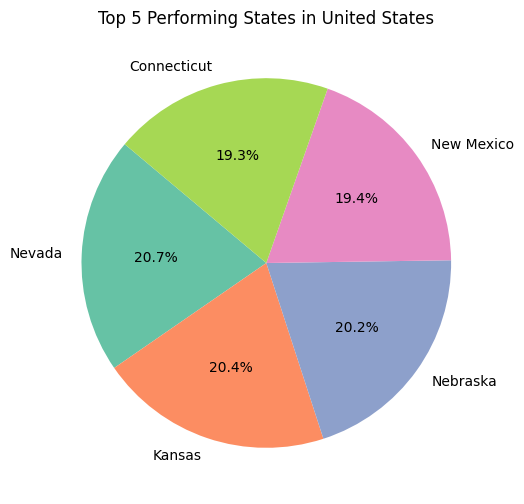

In [272]:
total_amounts = us_highrevenue_states['Total Amount']
states = us_highrevenue_states.index

plt.figure(figsize=(10,6))
plt.pie(total_amounts, labels=states, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top 5 Performing States in United States')
plt.show()

Top 5 performing states in United Kingdom

In [273]:
uk_stores = store_sales_prod[store_sales_prod['Country'] == 'United Kingdom']
uk_stores.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount,Country,State,Square Meters,Open Date
6,366004,1,2016-01-01,NaT,1107461,38,163,6,GBP,In-Store,...,1592.2,201,Televisions,2,TV and Video,9553.2,United Kingdom,Belfast,1800.0,2015-04-04
7,366004,2,2016-01-01,NaT,1107461,38,1529,2,GBP,In-Store,...,255.0,504,Smart phones & PDAs,5,Cell phones,510.0,United Kingdom,Belfast,1800.0,2015-04-04


In [274]:
uk_highrevenue_states = pd.DataFrame(uk_stores.groupby('State')['Total Amount'].sum())
uk_highrevenue_states = uk_highrevenue_states.sort_values(by='Total Amount', ascending=False).head()
uk_highrevenue_states


,Total Amount
State,
Belfast,995313.11
Dungannon and South Tyrone,911596.25
Blaenau Gwent,894119.16
North Down,886025.78
Ayrshire,841994.26


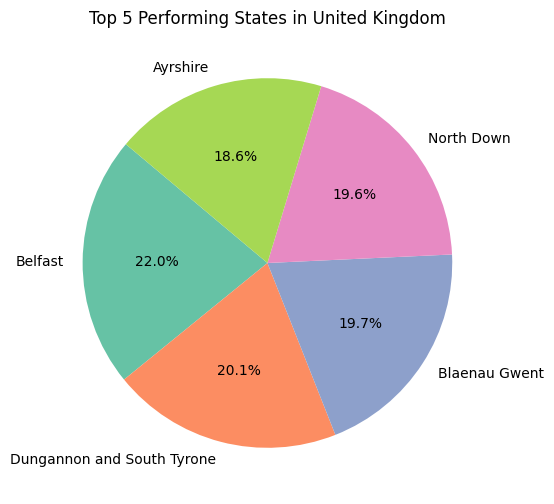

In [275]:
total_amounts = uk_highrevenue_states['Total Amount']
states = uk_highrevenue_states.index

plt.figure(figsize=(10,6))
plt.pie(total_amounts, labels=states, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top 5 Performing States in United Kingdom')
plt.xticks(rotation=30)
plt.show()

Top 5 performing states in Germany

In [276]:
german_stores = store_sales_prod[store_sales_prod['Country'] == 'Germany']
german_stores.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Order Type,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Amount,Country,State,Square Meters,Open Date
49,367011,1,2016-01-02,NaT,507981,22,39,1,EUR,In-Store,...,299.23,101,MP4&MP3,1,Audio,299.23,Germany,Freistaat Thüringen,2000.0,2008-03-06
108,369007,1,2016-01-04,NaT,571622,20,2510,3,EUR,In-Store,...,4.06,505,Cell phones Accessories,5,Cell phones,12.18,Germany,Brandenburg,1715.0,2012-12-15


In [277]:
germany_highrevenue_states = pd.DataFrame(german_stores.groupby('State')['Total Amount'].sum())
germany_highrevenue_states = germany_highrevenue_states.sort_values(by='Total Amount', ascending=False).head()
germany_highrevenue_states


,Total Amount
State,
Hessen,673559.95
Sachsen-Anhalt,657476.14
Freistaat Thüringen,652984.86
Hamburg,615040.59
Berlin,576574.93


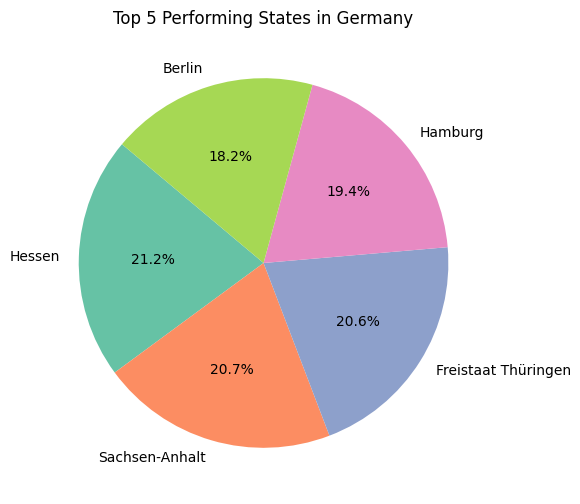

In [278]:
total_amounts = germany_highrevenue_states['Total Amount']
states = germany_highrevenue_states.index

plt.figure(figsize=(10,6))
plt.pie(total_amounts, labels=states, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top 5 Performing States in Germany')
plt.xticks(rotation=30)
plt.show()

### Inserting Data into DataBase

#### Customer Data Insertion

In [324]:
customer_data.head(2)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85,Senior
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44,Middle Age


In [323]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
 10  Age          15266 non-null  int32         
 11  Age Group    15266 non-null  category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 1.2+ MB


Inserting Customer Data to Customers table in database

In [325]:
# Connect to MySQL
conn = mysql.connector.connect(host='127.0.0.1',database='dataspark',user='root',password='admin')
cursor = conn.cursor()

# Customer Data into Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerKey INT PRIMARY KEY,
    Gender VARCHAR(20),
    Name VARCHAR(255),
    City VARCHAR(255),
    State_Code VARCHAR(255),
    State VARCHAR(255),
    Zip_Code VARCHAR(255),
    Country VARCHAR(255),
    Continent VARCHAR(255), 
    Birthday DATE,
    Age INT,
    Age_Group VARCHAR(255)
)
'''
cursor.execute(create_table_query)

for index, row in customer_data.iterrows():
    sql = '''INSERT INTO Customers (CustomerKey, Gender, Name, City, State_Code, State, Zip_Code, Country, Continent, Birthday, Age, Age_Group)
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
    values = (row['CustomerKey'], row['Gender'], row['Name'], row['City'],
                row['State Code'], row['State'], row['Zip Code'], row['Country'],
              row['Continent'], row['Birthday'], row['Age'], row['Age Group'])
    cursor.execute(sql, values)
    conn.commit()
    
cursor.close()
conn.close()



#### Sales Data Insertion

In [397]:
Order_Details[Order_Details['Order Type'] == 'In-Store'].value_counts().sum()

20746

In [367]:
sales_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order Number  62884 non-null  int64
 1   Line Item     62884 non-null  int64
 2   ProductKey    62884 non-null  int64
 3   Quantity      62884 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Inserting Normalized Sales data into Order details, online orders and sales tables in database

In [368]:
# Connect to MySQL
conn = mysql.connector.connect(host='127.0.0.1',database='dataspark',user='root',password='admin')
cursor = conn.cursor()

# Order Details into OrderDetails Table in Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS OrderDetails (
    Order_Number BIGINT PRIMARY KEY,
    Order_Date DATE,
    CustomerKey INT,
    StoreKey INT,
    Currency_Code VARCHAR(255),
    Order_Type VARCHAR(255),
    Year INT, 
    Month INT,
    Date INT, 
    Day VARCHAR(255) 
    
)
'''
cursor.execute(create_table_query)

for index, row in Order_Details.iterrows():
    sql = '''INSERT INTO OrderDetails (Order_Number, Order_Date, CustomerKey, StoreKey, Currency_Code, Order_Type, Year, Month, Date, Day)
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
    values = (row['Order Number'], row['Order Date'], row['CustomerKey'],
                row['StoreKey'], row['Currency Code'], row['Order Type'],
              row['Year'], row['Month'], row['Date'], row['Day'])
    cursor.execute(sql, values)
    conn.commit()


# Online Orders into OnlineOrders Table in Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS OnlineOrders (
    Order_Number BIGINT PRIMARY KEY,
    Order_Date DATE,
    Delivery_Date DATE 
    
)
'''
cursor.execute(create_table_query)

for index, row in Online_Orders.iterrows():
    sql = '''INSERT INTO OnlineOrders (Order_Number, Order_Date, Delivery_Date)
                VALUES (%s, %s, %s)'''
    values = (row['Order Number'], row['Order Date'], row['Delivery Date'])
    cursor.execute(sql, values)
    conn.commit()


# Sales new into Sales Table in Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS Sales (
    Order_Number BIGINT,
    Line_Item INT,
    ProductKey INT,
    Quantity INT
    
)
'''
cursor.execute(create_table_query)

for index, row in sales_data_new.iterrows():
    sql = '''INSERT INTO Sales (Order_Number, Line_Item, ProductKey, Quantity)
                VALUES (%s, %s, %s, %s)'''
    values = (int(row['Order Number']), int(row['Line Item']), int(row['ProductKey']), int(row['Quantity']))
    cursor.execute(sql, values)
    conn.commit()

cursor.close()
conn.close()

#### Products Data Insertion

In [370]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


Inserting Products data into Products table in database

In [371]:
# Connect to MySQL
conn = mysql.connector.connect(host='127.0.0.1',database='dataspark',user='root',password='admin')
cursor = conn.cursor()

# Product Data into Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS Products (
    ProductKey INT PRIMARY KEY,
    Product_Name VARCHAR(255),
    Brand VARCHAR(255),
    Color VARCHAR(255),
    Unit_Cost_USD FLOAT,
    Unit_Price_USD FLOAT,
    SubcategoryKey INT,
    Subcategory VARCHAR(255),
    CategoryKey INT, 
    Category VARCHAR(255)
    
)
'''
cursor.execute(create_table_query)

for index, row in products_data.iterrows():
    sql = '''INSERT INTO Products (ProductKey, Product_Name, Brand, Color, Unit_Cost_USD, Unit_Price_USD, SubcategoryKey, Subcategory, CategoryKey, Category)
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
    values = (row['ProductKey'], row['Product Name'], row['Brand'], row['Color'],
                row['Unit Cost USD'], row['Unit Price USD'], row['SubcategoryKey'], row['Subcategory'],
              row['CategoryKey'], row['Category'])
    cursor.execute(sql, values)
    conn.commit()

cursor.close()
conn.close()

#### Stores Data Insertion

In [373]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Country        67 non-null     object        
 2   State          67 non-null     object        
 3   Square Meters  67 non-null     float64       
 4   Open Date      67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


Inserting Stores data into Stores table in database

In [374]:
# Connect to MySQL
conn = mysql.connector.connect(host='127.0.0.1',database='dataspark',user='root',password='admin')
cursor = conn.cursor()

# Stores Data into Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS Stores (
    StoreKey INT PRIMARY KEY,
    Country VARCHAR(255),
    State VARCHAR(255),
    Square_Meters DECIMAL(10, 2),
    Open_Date DATE
    
)
'''
cursor.execute(create_table_query)

for index, row in stores_data.iterrows():
    sql = '''INSERT INTO Stores (StoreKey, Country, State, Square_Meters, Open_Date)
                VALUES (%s, %s, %s, %s, %s)'''
    values = (row['StoreKey'], row['Country'], row['State'], row['Square Meters'],row['Open Date'])
    cursor.execute(sql, values)
    conn.commit()

cursor.close()
conn.close()

#### Excahnge Rates Data Insertion

In [375]:
exchange_rates_data.columns

Index(['Date', 'Currency', 'Exchange'], dtype='object')

Inserting Exchange Rates to ExchangeRates tables in database

In [376]:
# Connect to MySQL
conn = mysql.connector.connect(host='127.0.0.1',database='dataspark',user='root',password='admin')
cursor = conn.cursor()

# Exchange_Rates Data into Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS ExchangeRates (
    Date DATE,
    Currency VARCHAR(255),
    Exchange FLOAT
    
)
'''
cursor.execute(create_table_query)

for index, row in exchange_rates_data.iterrows():
    sql = '''INSERT INTO ExchangeRates (Date, Currency, Exchange)
                VALUES (%s, %s, %s)'''
    values = (row['Date'], row['Currency'], row['Exchange'])
    cursor.execute(sql, values)
    conn.commit()
    
cursor.close()
conn.close()

#### Total Bill Per Order data Insertion

In [378]:
total_bill_final.head()

,Order Number,Total BillAmount,Order Date,CustomerKey,StoreKey,Order Type,Year,Month,Date,Day
0,366000,68.00,2016-01-01,265598,10,In-Store,2016,1,1,Friday
1,366001,1519.94,2016-01-01,1269051,0,Online,2016,1,1,Friday
3,366002,5164.00,2016-01-01,266019,0,Online,2016,1,1,Friday
6,366004,10063.20,2016-01-01,1107461,38,In-Store,2016,1,1,Friday
8,366005,1876.00,2016-01-01,844003,33,In-Store,2016,1,1,Friday


In [381]:
total_bill_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26326 entries, 0 to 62881
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Number      26326 non-null  int64         
 1   Total BillAmount  26326 non-null  float64       
 2   Order Date        26326 non-null  datetime64[ns]
 3   CustomerKey       26326 non-null  int64         
 4   StoreKey          26326 non-null  int64         
 5   Order Type        26326 non-null  object        
 6   Year              26326 non-null  int32         
 7   Month             26326 non-null  int32         
 8   Date              26326 non-null  int32         
 9   Day               26326 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(2)
memory usage: 1.9+ MB


In [383]:
# Connect to MySQL
conn = mysql.connector.connect(host='127.0.0.1',database='dataspark',user='root',password='admin')
cursor = conn.cursor()

# Exchange_Rates Data into Data Base ->
create_table_query = '''
CREATE TABLE IF NOT EXISTS TotalBillPerOrder (
    Order_Number BIGINT PRIMARY KEY,
    Total_BillAmount FLOAT,
    Order_Date DATE,
    CustomerKey INT,
    StoreKey INT,
    Order_Type VARCHAR(255),
    Year INT, 
    Month INT,
    Date INT, 
    Day VARCHAR(255)
    
)
'''
cursor.execute(create_table_query)

for index, row in total_bill_final.iterrows():
    sql = '''INSERT INTO TotalBillPerOrder (Order_Number, Total_BillAmount, Order_Date, CustomerKey, StoreKey, Order_Type, Year, Month, Date, Day)
                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''
    values = (row['Order Number'], row['Total BillAmount'], row['Order Date'], row['CustomerKey'],
                row['StoreKey'], row['Order Type'], row['Year'], row['Month'], row['Date'], row['Day'])
    cursor.execute(sql, values)
    conn.commit()
    
cursor.close()
conn.close()